In [1]:
import sys
sys.path.append("..")

#GPU configuration
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.Session(config=config)
set_session(sess)

import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scripts.data_generator as data_generator
import scripts.feature_ranking as feature_ranking
import scripts.features_2d as features_2d
import scripts.ga as ga
import scripts.cnn_models as cnn_models
import scripts.ga_evaluation as ga_evaluation
from IPython import get_ipython
from keras.backend.tensorflow_backend import set_session
from sklearn.metrics.cluster import adjusted_rand_score, silhouette_score
from tqdm import tqdm
import seaborn as sns
plt.ion()
plt.show()
sys.path.append("..")

random_state=4
random.seed( random_state )
np.random.seed(random_state)

%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device



>> std 2
COV 0.30000000000000004 
ARI  1.0, std 2


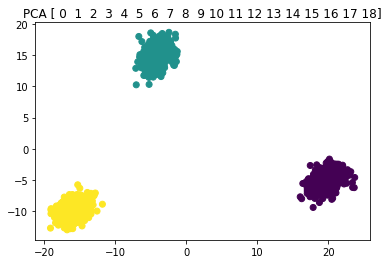

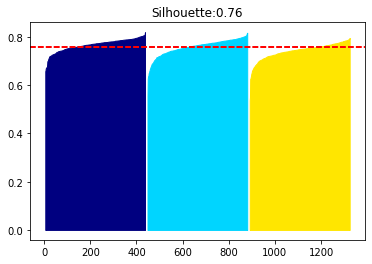

COV 0.30000000000000004 
ARI  1.0, std 2


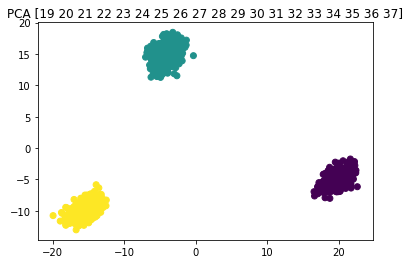

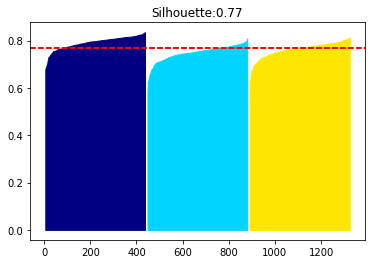

COV 0.30000000000000004 
ARI  1.0, std 2


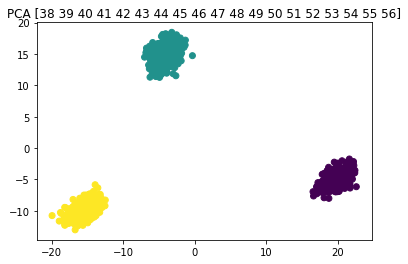

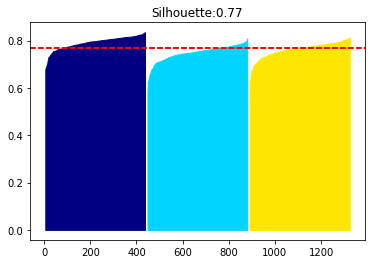

Total: (1300, 462), uniform (1300, 200) , normal (1300, 200),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.23 sec
Entropy computation 0.49 sec
KNN computation 0.01 sec
Sorting and thresholds 0.03 sec
Performing hierarchical clustering...
Hierarchical clustering 0.1 sec
Handle redundant features 0.02 sec
Returning 0 redundant features and  24 important features
*** Exploring 2D feature space with NN ...
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


trimming 757 to 231
handle_close_important (231, 3), total 757, 0.22211243212223053
relevant_features 270 => computing 1581 
trimming 1564 to 0
handle_important_features (231, 3),  total 1581, 0.22211243212223053
irrelevant_features 192 => computing 569
trimming 569 

  0%|          | 0/21 [00:00<?, ?it/s]

trimming 1365 to 462
handle_all_features (924, 3),  total 1373, 0.22211243212223053
Returning (924, 3), explored a total of 4280 feature pairs
*** Optimization algorithm 
Non redundant features 462, orig size 462, nb imp : 24
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:53<03:36, 12.75s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[8, 27, 46]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.485028,3.0,"Counter({1: 866, 0: 434})"


Selecting (20, 4) from archive


 38%|███▊      | 8/21 [01:28<02:01,  9.34s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[8, 27, 46]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.485028,3.0,"Counter({1: 866, 0: 434})"
1,"[5, 10, 24, 32, 43, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.468139,6.0,"Counter({1: 867, 0: 433})"


Selecting (31, 4) from archive


 57%|█████▋    | 12/21 [02:09<01:22,  9.19s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[8, 27, 46]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.485028,3.0,"Counter({1: 866, 0: 434})"
1,"[5, 10, 24, 32, 43, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.468139,6.0,"Counter({1: 867, 0: 433})"
2,"[0, 13, 29, 48]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.447368,4.0,"Counter({1: 867, 0: 433})"


Selecting (12, 4) from archive


 76%|███████▌  | 16/21 [03:18<01:09, 13.94s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[8, 27, 46]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.485028,3.0,"Counter({1: 866, 0: 434})"
1,"[5, 10, 24, 32, 43, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.468139,6.0,"Counter({1: 867, 0: 433})"
2,"[0, 13, 29, 48]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.447368,4.0,"Counter({1: 867, 0: 433})"
3,"[1, 7, 16, 20, 26, 39, 45]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.433283,7.0,"Counter({1: 867, 0: 433})"


Selecting (48, 4) from archive


 95%|█████████▌| 20/21 [04:12<00:11, 11.51s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[8, 27, 46]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.485028,3.0,"Counter({1: 866, 0: 434})"
1,"[5, 10, 24, 32, 43, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.468139,6.0,"Counter({1: 867, 0: 433})"
2,"[0, 13, 29, 48]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.447368,4.0,"Counter({1: 867, 0: 433})"
3,"[1, 7, 16, 20, 26, 39, 45]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.433283,7.0,"Counter({1: 867, 0: 433})"
4,"[35, 54]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.428921,2.0,"Counter({1: 867, 0: 433})"


Selecting (14, 4) from archive


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 462, orig size 462, nb imp : 24
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:31<02:18,  8.13s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.410474,"[0, 4, 5, 6, 10, 13, 19, 23, 24, 29, 32, 33, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",18.0,"Counter({1: 867, 0: 433})"


Selecting (41, 4) from archive


 38%|███▊      | 8/21 [02:55<05:05, 23.53s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.410474,"[0, 4, 5, 6, 10, 13, 19, 23, 24, 29, 32, 33, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",18.0,"Counter({1: 867, 0: 433})"
1,0.392065,"[8, 17, 27, 36, 46, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",6.0,"Counter({1: 866, 0: 434})"


Selecting (38, 4) from archive


 57%|█████▋    | 12/21 [04:49<03:54, 26.07s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.410474,"[0, 4, 5, 6, 10, 13, 19, 23, 24, 29, 32, 33, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",18.0,"Counter({1: 867, 0: 433})"
1,0.392065,"[8, 17, 27, 36, 46, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",6.0,"Counter({1: 866, 0: 434})"
2,0.386462,"[1, 7, 16, 20, 26, 31, 35, 39, 45, 50, 54]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",11.0,"Counter({1: 867, 0: 433})"


Selecting (50, 4) from archive


 76%|███████▌  | 16/21 [06:51<02:10, 26.09s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.410474,"[0, 4, 5, 6, 10, 13, 19, 23, 24, 29, 32, 33, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",18.0,"Counter({1: 867, 0: 433})"
1,0.392065,"[8, 17, 27, 36, 46, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",6.0,"Counter({1: 866, 0: 434})"
2,0.386462,"[1, 7, 16, 20, 26, 31, 35, 39, 45, 50, 54]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",11.0,"Counter({1: 867, 0: 433})"
3,0.207376,"[2, 9, 21, 28, 40, 47]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",6.0,"Counter({1: 842, 0: 401, -1: 57})"


Selecting (36, 4) from archive


 95%|█████████▌| 20/21 [08:44<00:25, 25.90s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.410474,"[0, 4, 5, 6, 10, 13, 19, 23, 24, 29, 32, 33, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",18.0,"Counter({1: 867, 0: 433})"
1,0.392065,"[8, 17, 27, 36, 46, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",6.0,"Counter({1: 866, 0: 434})"
2,0.386462,"[1, 7, 16, 20, 26, 31, 35, 39, 45, 50, 54]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",11.0,"Counter({1: 867, 0: 433})"
3,0.207376,"[2, 9, 21, 28, 40, 47]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",6.0,"Counter({1: 842, 0: 401, -1: 57})"
4,0.176026,"[11, 30, 49]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3.0,"Counter({1: 854, 0: 418, -1: 28})"


Selecting (32, 4) from archive


100%|██████████| 21/21 [09:21<00:00, 26.75s/it]


,adapted_ratkowsky_lance,features,partition,size,structure
0,0.410474,"[0, 4, 5, 6, 10, 13, 19, 23, 24, 29, 32, 33, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",18.0,"Counter({1: 867, 0: 433})"
1,0.392065,"[8, 17, 27, 36, 46, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",6.0,"Counter({1: 866, 0: 434})"
2,0.386462,"[1, 7, 16, 20, 26, 31, 35, 39, 45, 50, 54]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",11.0,"Counter({1: 867, 0: 433})"
3,0.207376,"[2, 9, 21, 28, 40, 47]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",6.0,"Counter({1: 842, 0: 401, -1: 57})"
4,0.176026,"[11, 30, 49]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3.0,"Counter({1: 854, 0: 418, -1: 28})"


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 462, orig size 462, nb imp : 24
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [01:33<06:48, 24.05s/it]

,features,partition,silhouette,size,structure
0,"[8, 27, 46]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.897041,3.0,"Counter({1: 866, 0: 434})"


Selecting (20, 4) from archive


 38%|███▊      | 8/21 [02:59<04:21, 20.13s/it]

,features,partition,silhouette,size,structure
0,"[8, 27, 46]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.897041,3.0,"Counter({1: 866, 0: 434})"
1,"[5, 24, 32, 43, 51]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.860044,5.0,"Counter({0: 867, 1: 433})"


Selecting (25, 4) from archive


 57%|█████▋    | 12/21 [04:37<03:14, 21.64s/it]

,features,partition,silhouette,size,structure
0,"[8, 27, 46]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.897041,3.0,"Counter({1: 866, 0: 434})"
1,"[5, 24, 32, 43, 51]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.860044,5.0,"Counter({0: 867, 1: 433})"
2,"[26, 45, 55]","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.852138,3.0,"Counter({0: 434, 2: 433, 1: 433})"


Selecting (32, 4) from archive


 76%|███████▌  | 16/21 [06:16<01:50, 22.13s/it]

,features,partition,silhouette,size,structure
0,"[8, 27, 46]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.897041,3.0,"Counter({1: 866, 0: 434})"
1,"[5, 24, 32, 43, 51]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.860044,5.0,"Counter({0: 867, 1: 433})"
2,"[26, 45, 55]","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.852138,3.0,"Counter({0: 434, 2: 433, 1: 433})"
3,"[7, 14, 17, 33, 35, 36, 52, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.833504,8.0,"Counter({1: 434, 0: 433, 2: 433})"


Selecting (40, 4) from archive


 95%|█████████▌| 20/21 [07:48<00:20, 20.41s/it]

,features,partition,silhouette,size,structure
0,"[8, 27, 46]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.897041,3.0,"Counter({1: 866, 0: 434})"
1,"[5, 24, 32, 43, 51]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.860044,5.0,"Counter({0: 867, 1: 433})"
2,"[26, 45, 55]","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.852138,3.0,"Counter({0: 434, 2: 433, 1: 433})"
3,"[7, 14, 17, 33, 35, 36, 52, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.833504,8.0,"Counter({1: 434, 0: 433, 2: 433})"
4,"[13, 29, 48]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.807566,3.0,"Counter({1: 867, 0: 433})"


Selecting (26, 4) from archive


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 462, orig size 462, nb imp : 24
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [01:12<05:13, 18.44s/it]

,adapted_silhouette,features,partition,size,structure
0,0.74701,"[0, 1, 2, 5, 7, 8, 9, 10, 11, 12, 14, 16, 17, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",40.0,"Counter({2: 434, 0: 433, 1: 433})"


Selecting (50, 4) from archive


 38%|███▊      | 8/21 [04:01<06:13, 28.75s/it]

,adapted_silhouette,features,partition,size,structure
0,0.747010,"[0, 1, 2, 5, 7, 8, 9, 10, 11, 12, 14, 16, 17, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",40.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.613789,"[6, 13, 18, 19, 25, 37, 38, 44]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.0,"Counter({1: 867, 0: 433})"


Selecting (50, 4) from archive


 57%|█████▋    | 12/21 [06:12<04:03, 27.00s/it]

,adapted_silhouette,features,partition,size,structure
0,0.747010,"[0, 1, 2, 5, 7, 8, 9, 10, 11, 12, 14, 16, 17, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",40.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.613789,"[6, 13, 18, 19, 25, 37, 38, 44]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.0,"Counter({1: 867, 0: 433})"
2,0.227646,"[4, 394]","[0, 0, 0, -1, 0, -1, 0, -1, 0, 0, 0, 0, 0, -1,...",2.0,"Counter({1: 705, -1: 310, 0: 285})"


Selecting (23, 4) from archive


 76%|███████▌  | 16/21 [07:26<01:36, 19.40s/it]

,adapted_silhouette,features,partition,size,structure
0,0.747010,"[0, 1, 2, 5, 7, 8, 9, 10, 11, 12, 14, 16, 17, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",40.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.613789,"[6, 13, 18, 19, 25, 37, 38, 44]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.0,"Counter({1: 867, 0: 433})"
2,0.227646,"[4, 394]","[0, 0, 0, -1, 0, -1, 0, -1, 0, 0, 0, 0, 0, -1,...",2.0,"Counter({1: 705, -1: 310, 0: 285})"
3,0.163544,"[31, 50, 121]","[1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, ...",3.0,"Counter({1: 780, -1: 316, 0: 204})"


Selecting (18, 4) from archive


 95%|█████████▌| 20/21 [08:43<00:17, 17.44s/it]

,adapted_silhouette,features,partition,size,structure
0,0.747010,"[0, 1, 2, 5, 7, 8, 9, 10, 11, 12, 14, 16, 17, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",40.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.613789,"[6, 13, 18, 19, 25, 37, 38, 44]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.0,"Counter({1: 867, 0: 433})"
2,0.227646,"[4, 394]","[0, 0, 0, -1, 0, -1, 0, -1, 0, 0, 0, 0, 0, -1,...",2.0,"Counter({1: 705, -1: 310, 0: 285})"
3,0.163544,"[31, 50, 121]","[1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, ...",3.0,"Counter({1: 780, -1: 316, 0: 204})"
4,0.109995,"[403, 459]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...",2.0,"Counter({1: 1103, -1: 187, 0: 10})"


Selecting (2, 4) from archive


100%|██████████| 21/21 [09:06<00:00, 26.03s/it]


COV 0.30000000000000004 
ARI  1.0, std 2


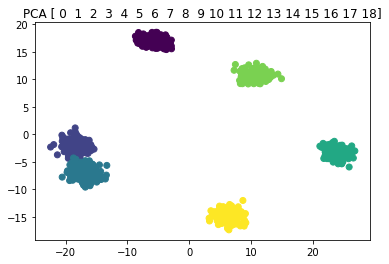

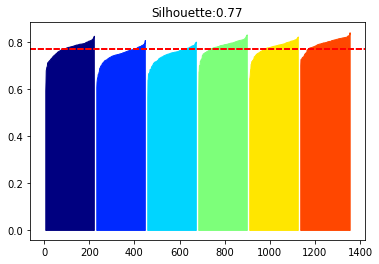

COV 0.30000000000000004 
ARI  1.0, std 2


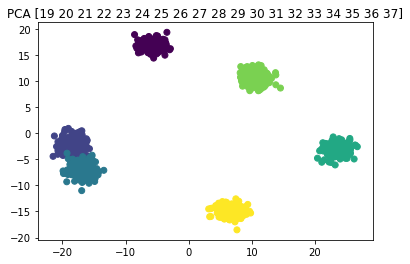

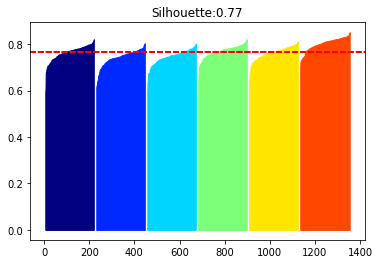

COV 0.30000000000000004 
ARI  1.0, std 2


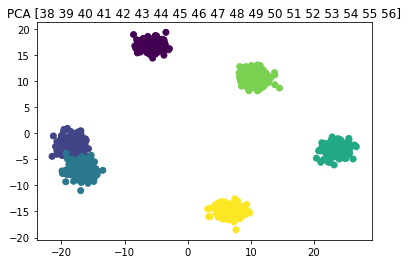

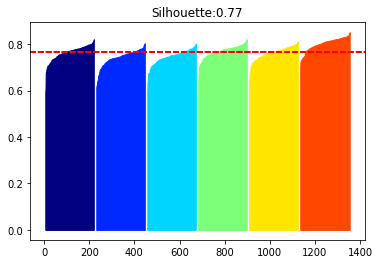

Total: (1300, 462), uniform (1300, 200) , normal (1300, 200),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.21 sec
Entropy computation 0.5 sec
KNN computation 0.01 sec
Sorting and thresholds 0.02 sec
Performing hierarchical clustering...
Hierarchical clustering 0.1 sec
Handle redundant features 0.02 sec
Returning 2 redundant features and  16 important features
*** Exploring 2D feature space with NN ...
handle_close_important (86, 3), total 795, 0.11612629145383835
relevant_features 281 => computing 1646 
trimming 1149 to 2
handle_important_features (88, 3),  total 1646, 0.11612629145383835
irrelevant_features 179 => computing 530
handle_not_important_features (91, 3), total 530, 0.11612629145383835
handle_all_features 460 => computing 1369


  0%|          | 0/21 [00:00<?, ?it/s]

handle_all_features (460, 3),  total 1369, 0.11612629145383835
Returning (460, 3), explored a total of 4340 feature pairs
*** Optimization algorithm 
Non redundant features 460, orig size 462, nb imp : 16
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [01:06<04:50, 17.08s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[7, 26, 45]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.445697,3.0,"Counter({1: 868, 0: 432})"


Selecting (4, 4) from archive


 38%|███▊      | 8/21 [02:30<03:57, 18.27s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[7, 26, 45]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.445697,3.0,"Counter({1: 868, 0: 432})"
1,"[17, 36, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.419615,3.0,"Counter({1: 1084, 0: 216})"


Selecting (4, 4) from archive


 57%|█████▋    | 12/21 [03:54<02:48, 18.72s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[7, 26, 45]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.445697,3.0,"Counter({1: 868, 0: 432})"
1,"[17, 36, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.419615,3.0,"Counter({1: 1084, 0: 216})"
2,"[12, 31, 50]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.396959,3.0,"Counter({1: 1084, 0: 216})"


Selecting (11, 4) from archive


 76%|███████▌  | 16/21 [05:20<01:37, 19.47s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[7, 26, 45]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.445697,3.0,"Counter({1: 868, 0: 432})"
1,"[17, 36, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.419615,3.0,"Counter({1: 1084, 0: 216})"
2,"[12, 31, 50]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.396959,3.0,"Counter({1: 1084, 0: 216})"
3,"[4, 19, 23, 38]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.388826,4.0,"Counter({1: 868, 0: 432})"


Selecting (21, 4) from archive


 95%|█████████▌| 20/21 [06:50<00:20, 20.69s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[7, 26, 45]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.445697,3.0,"Counter({1: 868, 0: 432})"
1,"[17, 36, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.419615,3.0,"Counter({1: 1084, 0: 216})"
2,"[12, 31, 50]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.396959,3.0,"Counter({1: 1084, 0: 216})"
3,"[4, 19, 23, 38]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.388826,4.0,"Counter({1: 868, 0: 432})"
4,"[24, 25, 43]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.398976,3.0,"Counter({1: 868, 0: 432})"


Selecting (15, 4) from archive


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 460, orig size 462, nb imp : 16
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [01:08<04:57, 17.52s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.333957,"[0, 4, 19, 23, 38, 42]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.0,"Counter({0: 868, 1: 432})"


Selecting (27, 4) from archive


 38%|███▊      | 8/21 [02:36<04:11, 19.37s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.333957,"[0, 4, 19, 23, 38, 42]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.0,"Counter({0: 868, 1: 432})"
1,0.314712,"[17, 36, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3.0,"Counter({1: 1084, 0: 216})"


Selecting (4, 4) from archive


 57%|█████▋    | 12/21 [03:54<02:48, 18.68s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.333957,"[0, 4, 19, 23, 38, 42]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.0,"Counter({0: 868, 1: 432})"
1,0.314712,"[17, 36, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3.0,"Counter({1: 1084, 0: 216})"
2,0.305933,"[9, 11, 12, 28, 31, 47, 50]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",7.0,"Counter({1: 1084, 0: 216})"


Selecting (13, 4) from archive


 76%|███████▌  | 16/21 [04:58<01:08, 13.72s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.333957,"[0, 4, 19, 23, 38, 42]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.0,"Counter({0: 868, 1: 432})"
1,0.314712,"[17, 36, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3.0,"Counter({1: 1084, 0: 216})"
2,0.305933,"[9, 11, 12, 28, 31, 47, 50]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",7.0,"Counter({1: 1084, 0: 216})"
3,0.334273,"[7, 26, 45]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3.0,"Counter({1: 868, 0: 432})"


Selecting (5, 4) from archive


 95%|█████████▌| 20/21 [05:37<00:10, 10.15s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.333957,"[0, 4, 19, 23, 38, 42]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.0,"Counter({0: 868, 1: 432})"
1,0.314712,"[17, 36, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3.0,"Counter({1: 1084, 0: 216})"
2,0.305933,"[9, 11, 12, 28, 31, 47, 50]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",7.0,"Counter({1: 1084, 0: 216})"
3,0.334273,"[7, 26, 45]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3.0,"Counter({1: 868, 0: 432})"
4,0.319398,"[8, 27, 46]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3.0,"Counter({0: 652, 1: 648})"


Selecting (5, 4) from archive


100%|██████████| 21/21 [05:54<00:00, 16.86s/it]


,adapted_ratkowsky_lance,features,partition,size,structure
0,0.333957,"[0, 4, 19, 23, 38, 42]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.0,"Counter({0: 868, 1: 432})"
1,0.314712,"[17, 36, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3.0,"Counter({1: 1084, 0: 216})"
2,0.305933,"[9, 11, 12, 28, 31, 47, 50]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",7.0,"Counter({1: 1084, 0: 216})"
3,0.334273,"[7, 26, 45]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3.0,"Counter({1: 868, 0: 432})"
4,0.319398,"[8, 27, 46]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3.0,"Counter({0: 652, 1: 648})"


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 460, orig size 462, nb imp : 16
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [01:15<05:35, 19.72s/it]

,features,partition,silhouette,size,structure
0,"[7, 26, 45]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.804229,3.0,"Counter({1: 868, 0: 432})"


Selecting (23, 4) from archive


 38%|███▊      | 8/21 [02:54<04:39, 21.52s/it]

,features,partition,silhouette,size,structure
0,"[7, 26, 45]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.804229,3.0,"Counter({1: 868, 0: 432})"
1,"[17, 36, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.800732,3.0,"Counter({1: 1084, 0: 216})"


Selecting (2, 4) from archive


 57%|█████▋    | 12/21 [04:27<03:09, 21.00s/it]

,features,partition,silhouette,size,structure
0,"[7, 26, 45]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.804229,3.0,"Counter({1: 868, 0: 432})"
1,"[17, 36, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.800732,3.0,"Counter({1: 1084, 0: 216})"
2,"[13, 32, 51, 457]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.816259,4.0,"Counter({1: 652, 0: 648})"


Selecting (28, 4) from archive


 76%|███████▌  | 16/21 [05:57<01:43, 20.61s/it]

,features,partition,silhouette,size,structure
0,"[7, 26, 45]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.804229,3.0,"Counter({1: 868, 0: 432})"
1,"[17, 36, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.800732,3.0,"Counter({1: 1084, 0: 216})"
2,"[13, 32, 51, 457]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.816259,4.0,"Counter({1: 652, 0: 648})"
3,"[12, 31, 50]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.785310,3.0,"Counter({1: 1084, 0: 216})"


Selecting (17, 4) from archive


 95%|█████████▌| 20/21 [07:38<00:22, 22.89s/it]

,features,partition,silhouette,size,structure
0,"[7, 26, 45]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.804229,3.0,"Counter({1: 868, 0: 432})"
1,"[17, 36, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.800732,3.0,"Counter({1: 1084, 0: 216})"
2,"[13, 32, 51, 457]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.816259,4.0,"Counter({1: 652, 0: 648})"
3,"[12, 31, 50]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.785310,3.0,"Counter({1: 1084, 0: 216})"
4,"[0, 8, 9, 14, 15, 16, 20, 23, 24, 27, 33, 34, ...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.783283,19.0,"Counter({0: 220, 5: 216, 4: 216, 1: 216, 3: 21..."


Selecting (50, 4) from archive


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 460, orig size 462, nb imp : 16
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [01:07<04:54, 17.34s/it]

,adapted_silhouette,features,partition,size,structure
0,0.75045,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",59.0,"Counter({0: 220, 4: 216, 2: 216, 3: 216, 1: 21..."


Selecting (50, 4) from archive


 38%|███▊      | 8/21 [03:23<05:15, 24.30s/it]

,adapted_silhouette,features,partition,size,structure
0,0.750450,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",59.0,"Counter({0: 220, 4: 216, 2: 216, 3: 216, 1: 21..."
1,0.046314,"[107, 458]","[3, 0, 0, -1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0,...",2.0,"Counter({0: 860, -1: 301, 3: 76, 1: 42, 2: 21})"


Selecting (2, 4) from archive


 57%|█████▋    | 12/21 [04:38<02:51, 19.08s/it]

,adapted_silhouette,features,partition,size,structure
0,0.750450,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",59.0,"Counter({0: 220, 4: 216, 2: 216, 3: 216, 1: 21..."
1,0.046314,"[107, 458]","[3, 0, 0, -1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0,...",2.0,"Counter({0: 860, -1: 301, 3: 76, 1: 42, 2: 21})"
2,0.026859,"[108, 209]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2.0,"Counter({1: 1208, -1: 79, 0: 13})"


Selecting (27, 4) from archive


 76%|███████▌  | 16/21 [06:07<01:42, 20.49s/it]

,adapted_silhouette,features,partition,size,structure
0,0.750450,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",59.0,"Counter({0: 220, 4: 216, 2: 216, 3: 216, 1: 21..."
1,0.046314,"[107, 458]","[3, 0, 0, -1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0,...",2.0,"Counter({0: 860, -1: 301, 3: 76, 1: 42, 2: 21})"
2,0.026859,"[108, 209]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2.0,"Counter({1: 1208, -1: 79, 0: 13})"
3,0.000000,"[57, 58, 59, 61, 62, 63, 64, 65, 68, 69, 70, 7...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",210.0,Counter({-1: 1300})


Selecting (50, 4) from archive


 95%|█████████▌| 20/21 [09:41<00:32, 32.96s/it]

,adapted_silhouette,features,partition,size,structure
0,0.750450,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",59.0,"Counter({0: 220, 4: 216, 2: 216, 3: 216, 1: 21..."
1,0.046314,"[107, 458]","[3, 0, 0, -1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0,...",2.0,"Counter({0: 860, -1: 301, 3: 76, 1: 42, 2: 21})"
2,0.026859,"[108, 209]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2.0,"Counter({1: 1208, -1: 79, 0: 13})"
3,0.000000,"[57, 58, 59, 61, 62, 63, 64, 65, 68, 69, 70, 7...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",210.0,Counter({-1: 1300})
4,0.024932,"[77, 188, 255]","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1...",3.0,"Counter({1: 1036, -1: 249, 0: 15})"


Selecting (3, 4) from archive


100%|██████████| 21/21 [10:07<00:00, 28.91s/it]


COV 0.30000000000000004 
ARI  1.0, std 2


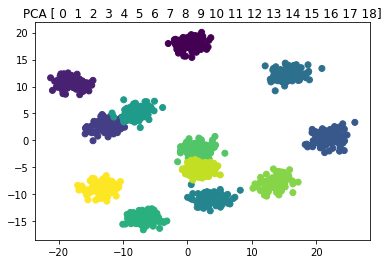

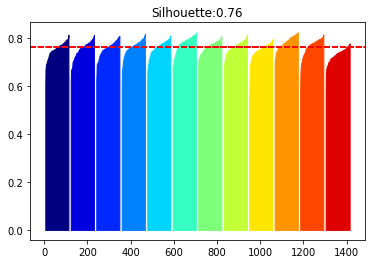

COV 0.30000000000000004 
ARI  1.0, std 2


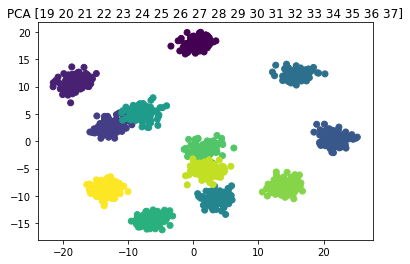

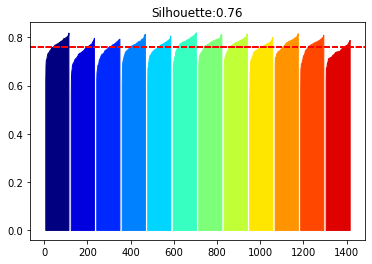

COV 0.30000000000000004 
ARI  1.0, std 2


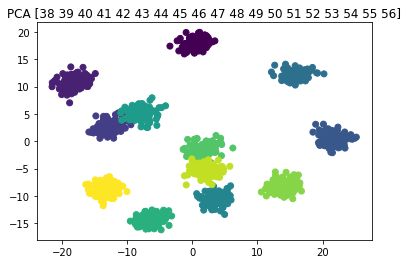

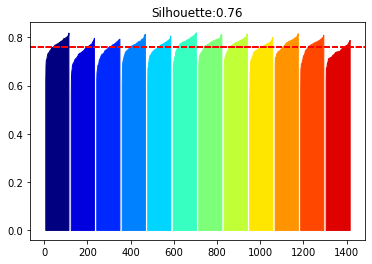

Total: (1300, 462), uniform (1300, 200) , normal (1300, 200),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.22 sec
Entropy computation 0.48 sec
KNN computation 0.01 sec
Sorting and thresholds 0.01 sec
Performing hierarchical clustering...
Hierarchical clustering 0.08 sec
Handle redundant features 0.02 sec
Returning 1 redundant features and  17 important features
*** Exploring 2D feature space with NN ...
handle_close_important (0, 3), total 785, nan
relevant_features 278 => computing 1627 
handle_important_features (0, 3),  total 1627, nan
irrelevant_features 183 => computing 538
handle_not_important_features (0, 3), total 538, nan
handle_all_features 461 => computing 1367


  0%|          | 0/21 [00:00<?, ?it/s]

handle_all_features (0, 3),  total 1367, nan
Returning (0, 3), explored a total of 4317 feature pairs
*** Optimization algorithm 
Non redundant features 461, orig size 462, nb imp : 17
adding 50 random population


 19%|█▉        | 4/21 [00:46<03:15, 11.47s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 1, 5, 19, 24, 38, 43, 60]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.290984,8.0,"Counter({1: 972, 0: 328})"


adding 21 random population


 38%|███▊      | 8/21 [01:37<02:28, 11.39s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 1, 5, 19, 24, 38, 43, 60]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.290984,8.0,"Counter({1: 972, 0: 328})"
1,"[3, 22, 41, 42]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.244143,4.0,"Counter({1: 1084, 0: 216})"


adding 12 random population


 57%|█████▋    | 12/21 [02:21<01:36, 10.68s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 1, 5, 19, 24, 38, 43, 60]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.290984,8.0,"Counter({1: 972, 0: 328})"
1,"[3, 22, 41, 42]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.244143,4.0,"Counter({1: 1084, 0: 216})"
2,"[13, 32, 51]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.445058,3.0,"Counter({0: 760, 1: 540})"


adding 27 random population


 76%|███████▌  | 16/21 [03:11<00:56, 11.30s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 1, 5, 19, 24, 38, 43, 60]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.290984,8.0,"Counter({1: 972, 0: 328})"
1,"[3, 22, 41, 42]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.244143,4.0,"Counter({1: 1084, 0: 216})"
2,"[13, 32, 51]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.445058,3.0,"Counter({0: 760, 1: 540})"
3,"[4, 23, 36]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.385636,3.0,"Counter({1: 652, 0: 648})"


adding 23 random population


 95%|█████████▌| 20/21 [04:14<00:14, 14.99s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 1, 5, 19, 24, 38, 43, 60]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.290984,8.0,"Counter({1: 972, 0: 328})"
1,"[3, 22, 41, 42]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.244143,4.0,"Counter({1: 1084, 0: 216})"
2,"[13, 32, 51]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.445058,3.0,"Counter({0: 760, 1: 540})"
3,"[4, 23, 36]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.385636,3.0,"Counter({1: 652, 0: 648})"
4,"[14, 33, 52]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.341062,3.0,"Counter({1: 976, 0: 324})"


adding 25 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 461, orig size 462, nb imp : 17
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
adding 50 random population


 19%|█▉        | 4/21 [01:28<06:13, 21.95s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.280682,"[4, 17, 23, 36, 42, 55, 82]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.0,"Counter({0: 652, 1: 648})"


adding 19 random population


 38%|███▊      | 8/21 [03:01<04:37, 21.36s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.280682,"[4, 17, 23, 36, 42, 55, 82]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.0,"Counter({0: 652, 1: 648})"
1,0.333793,"[13, 32, 51]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3.0,"Counter({0: 760, 1: 540})"


adding 20 random population


 57%|█████▋    | 12/21 [04:30<03:12, 21.33s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.280682,"[4, 17, 23, 36, 42, 55, 82]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.0,"Counter({0: 652, 1: 648})"
1,0.333793,"[13, 32, 51]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3.0,"Counter({0: 760, 1: 540})"
2,0.258569,"[0, 1, 5, 19, 24, 38, 43, 345]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",8.0,"Counter({1: 972, 0: 328})"


adding 45 random population


 76%|███████▌  | 16/21 [05:58<01:41, 20.34s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.280682,"[4, 17, 23, 36, 42, 55, 82]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.0,"Counter({0: 652, 1: 648})"
1,0.333793,"[13, 32, 51]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3.0,"Counter({0: 760, 1: 540})"
2,0.258569,"[0, 1, 5, 19, 24, 38, 43, 345]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",8.0,"Counter({1: 972, 0: 328})"
3,0.153109,"[7, 26, 45, 186]","[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4.0,"Counter({0: 716, 1: 512, -1: 72})"


adding 26 random population


 95%|█████████▌| 20/21 [07:24<00:20, 20.89s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.280682,"[4, 17, 23, 36, 42, 55, 82]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.0,"Counter({0: 652, 1: 648})"
1,0.333793,"[13, 32, 51]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3.0,"Counter({0: 760, 1: 540})"
2,0.258569,"[0, 1, 5, 19, 24, 38, 43, 345]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",8.0,"Counter({1: 972, 0: 328})"
3,0.153109,"[7, 26, 45, 186]","[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4.0,"Counter({0: 716, 1: 512, -1: 72})"
4,0.202180,"[2, 8, 21, 40, 157]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.0,"Counter({1: 976, 0: 324})"


adding 17 random population


100%|██████████| 21/21 [08:02<00:00, 22.97s/it]


,adapted_ratkowsky_lance,features,partition,size,structure
0,0.280682,"[4, 17, 23, 36, 42, 55, 82]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.0,"Counter({0: 652, 1: 648})"
1,0.333793,"[13, 32, 51]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3.0,"Counter({0: 760, 1: 540})"
2,0.258569,"[0, 1, 5, 19, 24, 38, 43, 345]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",8.0,"Counter({1: 972, 0: 328})"
3,0.153109,"[7, 26, 45, 186]","[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4.0,"Counter({0: 716, 1: 512, -1: 72})"
4,0.202180,"[2, 8, 21, 40, 157]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.0,"Counter({1: 976, 0: 324})"


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 461, orig size 462, nb imp : 17
adding 50 random population


 19%|█▉        | 4/21 [01:34<06:51, 24.22s/it]

,features,partition,silhouette,size,structure
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",0.75802,57.0,"Counter({9: 112, 3: 108, 10: 108, 11: 108, 0: ..."


adding 50 random population


 38%|███▊      | 8/21 [05:53<08:48, 40.64s/it]

,features,partition,silhouette,size,structure
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",0.758020,57.0,"Counter({9: 112, 3: 108, 10: 108, 11: 108, 0: ..."
1,"[32, 448]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0,...",0.565535,2.0,"Counter({1: 734, 0: 531, -1: 35})"


adding 50 random population


 57%|█████▋    | 12/21 [07:37<04:10, 27.81s/it]

,features,partition,silhouette,size,structure
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",0.758020,57.0,"Counter({9: 112, 3: 108, 10: 108, 11: 108, 0: ..."
1,"[32, 448]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0,...",0.565535,2.0,"Counter({1: 734, 0: 531, -1: 35})"
2,"[265, 374]","[1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, -1...",0.103828,2.0,"Counter({1: 988, -1: 299, 0: 13})"


adding 1 random population


 76%|███████▌  | 16/21 [09:16<02:01, 24.33s/it]

,features,partition,silhouette,size,structure
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",0.758020,57.0,"Counter({9: 112, 3: 108, 10: 108, 11: 108, 0: ..."
1,"[32, 448]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0,...",0.565535,2.0,"Counter({1: 734, 0: 531, -1: 35})"
2,"[265, 374]","[1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, -1...",0.103828,2.0,"Counter({1: 988, -1: 299, 0: 13})"
3,"[276, 301]","[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, -1, ...",0.085270,2.0,"Counter({0: 976, -1: 313, 1: 11})"


adding 11 random population


 95%|█████████▌| 20/21 [10:55<00:23, 23.55s/it]

,features,partition,silhouette,size,structure
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",0.758020,57.0,"Counter({9: 112, 3: 108, 10: 108, 11: 108, 0: ..."
1,"[32, 448]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0,...",0.565535,2.0,"Counter({1: 734, 0: 531, -1: 35})"
2,"[265, 374]","[1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, -1...",0.103828,2.0,"Counter({1: 988, -1: 299, 0: 13})"
3,"[276, 301]","[0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, -1, -1, ...",0.085270,2.0,"Counter({0: 976, -1: 313, 1: 11})"
4,"[360, 375]","[0, 0, 0, 0, -1, 0, -1, 0, 0, 1, -1, 0, -1, -1...",0.159820,2.0,"Counter({0: 1051, -1: 239, 1: 10})"


adding 1 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 461, orig size 462, nb imp : 17
adding 50 random population


 19%|█▉        | 4/21 [01:19<05:47, 20.44s/it]

,adapted_silhouette,features,partition,size,structure
0,0.74787,"[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",56.0,"Counter({8: 112, 5: 108, 10: 108, 9: 108, 3: 1..."


adding 50 random population


 38%|███▊      | 8/21 [05:01<07:28, 34.50s/it]

,adapted_silhouette,features,partition,size,structure
0,0.747870,"[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",56.0,"Counter({8: 112, 5: 108, 10: 108, 9: 108, 3: 1..."
1,0.316967,"[0, 275]","[0, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, -1, 0, ...",2.0,"Counter({0: 806, 1: 412, -1: 82})"


adding 48 random population


 57%|█████▋    | 12/21 [06:29<03:31, 23.55s/it]

,adapted_silhouette,features,partition,size,structure
0,0.747870,"[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",56.0,"Counter({8: 112, 5: 108, 10: 108, 9: 108, 3: 1..."
1,0.316967,"[0, 275]","[0, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, -1, 0, ...",2.0,"Counter({0: 806, 1: 412, -1: 82})"
2,0.127917,"[272, 416]","[1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1,...",2.0,"Counter({1: 1104, -1: 182, 0: 14})"


adding 4 random population


 76%|███████▌  | 16/21 [08:35<02:21, 28.31s/it]

,adapted_silhouette,features,partition,size,structure
0,0.747870,"[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",56.0,"Counter({8: 112, 5: 108, 10: 108, 9: 108, 3: 1..."
1,0.316967,"[0, 275]","[0, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, -1, 0, ...",2.0,"Counter({0: 806, 1: 412, -1: 82})"
2,0.127917,"[272, 416]","[1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1,...",2.0,"Counter({1: 1104, -1: 182, 0: 14})"
3,0.109579,"[326, 360]","[1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, ...",2.0,"Counter({1: 1082, -1: 205, 0: 13})"


adding 8 random population


 95%|█████████▌| 20/21 [10:55<00:32, 32.40s/it]

,adapted_silhouette,features,partition,size,structure
0,0.747870,"[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",56.0,"Counter({8: 112, 5: 108, 10: 108, 9: 108, 3: 1..."
1,0.316967,"[0, 275]","[0, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, -1, 0, ...",2.0,"Counter({0: 806, 1: 412, -1: 82})"
2,0.127917,"[272, 416]","[1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1,...",2.0,"Counter({1: 1104, -1: 182, 0: 14})"
3,0.109579,"[326, 360]","[1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, ...",2.0,"Counter({1: 1082, -1: 205, 0: 13})"
4,0.068326,"[327, 418]","[1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1...",2.0,"Counter({1: 970, -1: 318, 0: 12})"


adding 1 random population


100%|██████████| 21/21 [11:43<00:00, 33.51s/it]


>> std 5
COV 0.6 
ARI  1.0, std 5


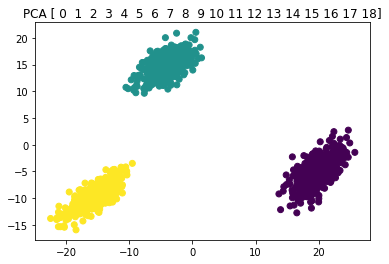

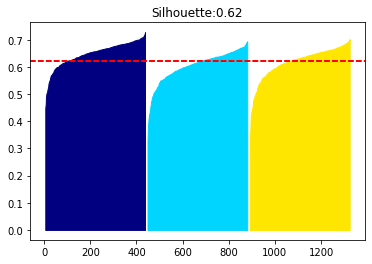

COV 0.6 
ARI  1.0, std 5


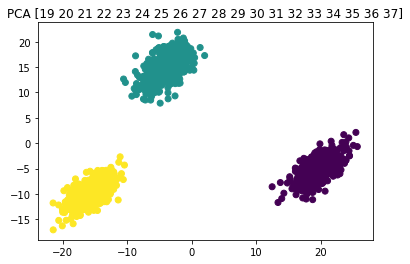

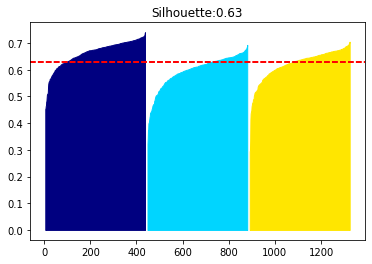

COV 0.6 
ARI  1.0, std 5


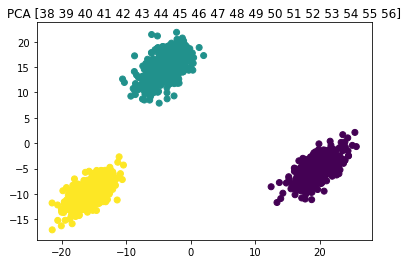

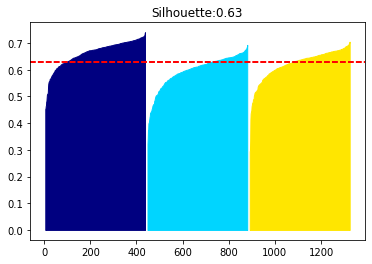

Total: (1300, 462), uniform (1300, 200) , normal (1300, 200),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.31 sec
Entropy computation 0.92 sec
KNN computation 0.02 sec
Sorting and thresholds 0.06 sec
Performing hierarchical clustering...
Hierarchical clustering 0.14 sec
Handle redundant features 0.04 sec
Returning 0 redundant features and  19 important features
*** Exploring 2D feature space with NN ...
trimming 785 to 231
handle_close_important (231, 3), total 785, 0.21412386000156403
relevant_features 279 => computing 1622 
trimming 1612 to 0
handle_important_features (231, 3),  total 1622, 0.21412386000156403
irrelevant_features 183 => computing 538
trimming 538 to 231
handle_not_important_features (462, 3), total 538, 0.21412386000156403
hand

  0%|          | 0/21 [00:00<?, ?it/s]

trimming 1364 to 462
handle_all_features (924, 3),  total 1373, 0.21412386000156403
Returning (924, 3), explored a total of 4318 feature pairs
*** Optimization algorithm 
Non redundant features 462, orig size 462, nb imp : 19
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [01:16<05:34, 19.66s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[8, 27, 46]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.461866,3.0,"Counter({1: 866, 0: 434})"


Selecting (17, 4) from archive


 38%|███▊      | 8/21 [02:44<04:25, 20.41s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[8, 27, 46]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.461866,3.0,"Counter({1: 866, 0: 434})"
1,"[5, 13, 24, 43, 51]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.435157,5.0,"Counter({0: 867, 1: 433})"


Selecting (36, 4) from archive


 57%|█████▋    | 12/21 [04:21<03:15, 21.78s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[8, 27, 46]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.461866,3.0,"Counter({1: 866, 0: 434})"
1,"[5, 13, 24, 43, 51]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.435157,5.0,"Counter({0: 867, 1: 433})"
2,"[7, 16, 26, 45, 54]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.410032,5.0,"Counter({1: 867, 0: 433})"


Selecting (35, 4) from archive


 76%|███████▌  | 16/21 [05:17<01:09, 13.96s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[8, 27, 46]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.461866,3.0,"Counter({1: 866, 0: 434})"
1,"[5, 13, 24, 43, 51]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.435157,5.0,"Counter({0: 867, 1: 433})"
2,"[7, 16, 26, 45, 54]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.410032,5.0,"Counter({1: 867, 0: 433})"
3,"[14, 29, 32, 33, 48]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.384902,5.0,"Counter({1: 867, 0: 433})"


Selecting (42, 4) from archive


 95%|█████████▌| 20/21 [06:09<00:12, 12.31s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[8, 27, 46]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.461866,3.0,"Counter({1: 866, 0: 434})"
1,"[5, 13, 24, 43, 51]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.435157,5.0,"Counter({0: 867, 1: 433})"
2,"[7, 16, 26, 45, 54]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.410032,5.0,"Counter({1: 867, 0: 433})"
3,"[14, 29, 32, 33, 48]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.384902,5.0,"Counter({1: 867, 0: 433})"
4,"[0, 4, 10, 19, 23, 38, 42]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.344566,7.0,"Counter({1: 867, 0: 433})"


Selecting (42, 4) from archive


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 462, orig size 462, nb imp : 19
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:34<02:27,  8.70s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.350495,"[2, 8, 17, 27, 28, 36, 46, 47, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",9.0,"Counter({1: 866, 0: 434})"


Selecting (24, 4) from archive


 38%|███▊      | 8/21 [01:33<02:41, 12.41s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.350495,"[2, 8, 17, 27, 28, 36, 46, 47, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",9.0,"Counter({1: 866, 0: 434})"
1,0.362988,"[0, 5, 6, 10, 13, 14, 24, 29, 32, 33, 38, 43, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",15.0,"Counter({1: 867, 0: 433})"


Selecting (47, 4) from archive


 57%|█████▋    | 12/21 [03:03<02:30, 16.73s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.350495,"[2, 8, 17, 27, 28, 36, 46, 47, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",9.0,"Counter({1: 866, 0: 434})"
1,0.362988,"[0, 5, 6, 10, 13, 14, 24, 29, 32, 33, 38, 43, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",15.0,"Counter({1: 867, 0: 433})"
2,0.339146,"[1, 7, 16, 20, 26, 35, 39, 45, 54]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",9.0,"Counter({1: 867, 0: 433})"


Selecting (50, 4) from archive


 76%|███████▌  | 16/21 [04:05<01:08, 13.70s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.350495,"[2, 8, 17, 27, 28, 36, 46, 47, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",9.0,"Counter({1: 866, 0: 434})"
1,0.362988,"[0, 5, 6, 10, 13, 14, 24, 29, 32, 33, 38, 43, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",15.0,"Counter({1: 867, 0: 433})"
2,0.339146,"[1, 7, 16, 20, 26, 35, 39, 45, 54]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",9.0,"Counter({1: 867, 0: 433})"
3,0.138492,"[4, 9, 11, 18, 19, 21, 23, 25, 30, 37, 40, 42,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",15.0,"Counter({0: 433, 2: 422, 1: 414, -1: 31})"


Selecting (30, 4) from archive


 95%|█████████▌| 20/21 [05:10<00:12, 12.91s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.350495,"[2, 8, 17, 27, 28, 36, 46, 47, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",9.0,"Counter({1: 866, 0: 434})"
1,0.362988,"[0, 5, 6, 10, 13, 14, 24, 29, 32, 33, 38, 43, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",15.0,"Counter({1: 867, 0: 433})"
2,0.339146,"[1, 7, 16, 20, 26, 35, 39, 45, 54]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",9.0,"Counter({1: 867, 0: 433})"
3,0.138492,"[4, 9, 11, 18, 19, 21, 23, 25, 30, 37, 40, 42,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",15.0,"Counter({0: 433, 2: 422, 1: 414, -1: 31})"
4,0.035987,"[12, 31, 50]","[-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1...",3.0,"Counter({1: 767, -1: 495, 0: 38})"


Selecting (5, 4) from archive


100%|██████████| 21/21 [05:21<00:00, 15.33s/it]


,adapted_ratkowsky_lance,features,partition,size,structure
0,0.350495,"[2, 8, 17, 27, 28, 36, 46, 47, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",9.0,"Counter({1: 866, 0: 434})"
1,0.362988,"[0, 5, 6, 10, 13, 14, 24, 29, 32, 33, 38, 43, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",15.0,"Counter({1: 867, 0: 433})"
2,0.339146,"[1, 7, 16, 20, 26, 35, 39, 45, 54]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",9.0,"Counter({1: 867, 0: 433})"
3,0.138492,"[4, 9, 11, 18, 19, 21, 23, 25, 30, 37, 40, 42,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",15.0,"Counter({0: 433, 2: 422, 1: 414, -1: 31})"
4,0.035987,"[12, 31, 50]","[-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1...",3.0,"Counter({1: 767, -1: 495, 0: 38})"


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 462, orig size 462, nb imp : 19
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [01:12<05:19, 18.78s/it]

,features,partition,silhouette,size,structure
0,"[8, 27, 46]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.830987,3.0,"Counter({1: 866, 0: 434})"


Selecting (16, 4) from archive


 38%|███▊      | 8/21 [03:15<05:30, 25.39s/it]

,features,partition,silhouette,size,structure
0,"[8, 27, 46]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.830987,3.0,"Counter({1: 866, 0: 434})"
1,"[5, 24, 43]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.788042,3.0,"Counter({0: 867, 1: 433})"


Selecting (18, 4) from archive


 57%|█████▋    | 12/21 [05:07<03:50, 25.66s/it]

,features,partition,silhouette,size,structure
0,"[8, 27, 46]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.830987,3.0,"Counter({1: 866, 0: 434})"
1,"[5, 24, 43]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.788042,3.0,"Counter({0: 867, 1: 433})"
2,"[7, 14, 16, 17, 26, 33, 36, 45, 52, 54, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.745777,11.0,"Counter({2: 434, 0: 433, 1: 433})"


Selecting (49, 4) from archive


 76%|███████▌  | 16/21 [07:15<02:17, 27.44s/it]

,features,partition,silhouette,size,structure
0,"[8, 27, 46]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.830987,3.0,"Counter({1: 866, 0: 434})"
1,"[5, 24, 43]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.788042,3.0,"Counter({0: 867, 1: 433})"
2,"[7, 14, 16, 17, 26, 33, 36, 45, 52, 54, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.745777,11.0,"Counter({2: 434, 0: 433, 1: 433})"
3,"[10, 13, 32, 38, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.715204,5.0,"Counter({1: 867, 0: 433})"


Selecting (45, 4) from archive


 95%|█████████▌| 20/21 [09:32<00:30, 30.55s/it]

,features,partition,silhouette,size,structure
0,"[8, 27, 46]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.830987,3.0,"Counter({1: 866, 0: 434})"
1,"[5, 24, 43]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.788042,3.0,"Counter({0: 867, 1: 433})"
2,"[7, 14, 16, 17, 26, 33, 36, 45, 52, 54, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.745777,11.0,"Counter({2: 434, 0: 433, 1: 433})"
3,"[10, 13, 32, 38, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.715204,5.0,"Counter({1: 867, 0: 433})"
4,"[42, 48]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.645287,2.0,"Counter({1: 868, 0: 432})"


Selecting (22, 4) from archive


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 462, orig size 462, nb imp : 19
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [01:34<06:50, 24.15s/it]

,adapted_silhouette,features,partition,size,structure
0,0.668646,"[0, 7, 8, 9, 10, 14, 16, 17, 21, 24, 26, 27, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",25.0,"Counter({2: 434, 0: 433, 1: 433})"


Selecting (50, 4) from archive


 38%|███▊      | 8/21 [04:31<07:03, 32.57s/it]

,adapted_silhouette,features,partition,size,structure
0,0.668646,"[0, 7, 8, 9, 10, 14, 16, 17, 21, 24, 26, 27, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",25.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.606030,"[4, 5, 13, 19, 23, 25, 29, 32, 38, 42, 48]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11.0,"Counter({1: 867, 0: 433})"


Selecting (50, 4) from archive


 57%|█████▋    | 12/21 [06:35<04:00, 26.75s/it]

,adapted_silhouette,features,partition,size,structure
0,0.668646,"[0, 7, 8, 9, 10, 14, 16, 17, 21, 24, 26, 27, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",25.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.606030,"[4, 5, 13, 19, 23, 25, 29, 32, 38, 42, 48]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11.0,"Counter({1: 867, 0: 433})"
2,0.212855,"[28, 47]","[4, 13, 2, 2, 8, 3, 14, 4, 18, 24, 15, 2, 2, 3...",2.0,"Counter({-1: 240, 2: 104, 4: 94, 13: 67, 21: 6..."


Selecting (1, 4) from archive


 76%|███████▌  | 16/21 [08:00<01:51, 22.33s/it]

,adapted_silhouette,features,partition,size,structure
0,0.668646,"[0, 7, 8, 9, 10, 14, 16, 17, 21, 24, 26, 27, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",25.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.606030,"[4, 5, 13, 19, 23, 25, 29, 32, 38, 42, 48]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11.0,"Counter({1: 867, 0: 433})"
2,0.212855,"[28, 47]","[4, 13, 2, 2, 8, 3, 14, 4, 18, 24, 15, 2, 2, 3...",2.0,"Counter({-1: 240, 2: 104, 4: 94, 13: 67, 21: 6..."
3,0.407832,"[1, 2, 12, 20, 30, 37, 39, 49, 50]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",9.0,"Counter({1: 859, 0: 422, -1: 19})"


Selecting (7, 4) from archive


 95%|█████████▌| 20/21 [10:00<00:23, 23.10s/it]

,adapted_silhouette,features,partition,size,structure
0,0.668646,"[0, 7, 8, 9, 10, 14, 16, 17, 21, 24, 26, 27, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",25.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.606030,"[4, 5, 13, 19, 23, 25, 29, 32, 38, 42, 48]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11.0,"Counter({1: 867, 0: 433})"
2,0.212855,"[28, 47]","[4, 13, 2, 2, 8, 3, 14, 4, 18, 24, 15, 2, 2, 3...",2.0,"Counter({-1: 240, 2: 104, 4: 94, 13: 67, 21: 6..."
3,0.407832,"[1, 2, 12, 20, 30, 37, 39, 49, 50]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",9.0,"Counter({1: 859, 0: 422, -1: 19})"
4,0.038507,"[436, 459]","[1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1,...",2.0,"Counter({1: 817, -1: 469, 0: 14})"


Selecting (2, 4) from archive


100%|██████████| 21/21 [10:22<00:00, 29.64s/it]


COV 0.6 


/tf/notebooks/discoverS_draft/scripts/data_generator.py:163: RuntimeWarning: covariance is not positive-semidefinite.
  arr = np.random.multivariate_normal(centers[cluster], d_covs[cluster], ns[cluster])


ARI  1.0, std 5


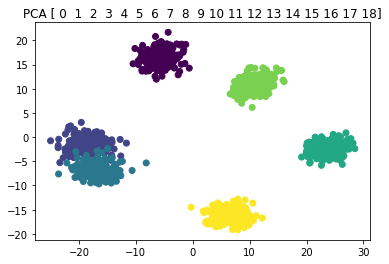

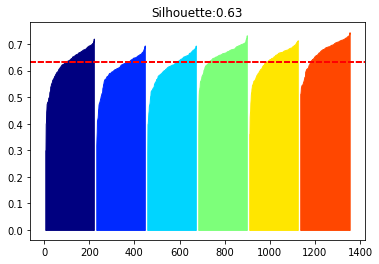

COV 0.6 


/tf/notebooks/discoverS_draft/scripts/data_generator.py:163: RuntimeWarning: covariance is not positive-semidefinite.
  arr = np.random.multivariate_normal(centers[cluster], d_covs[cluster], ns[cluster])


ARI  1.0, std 5


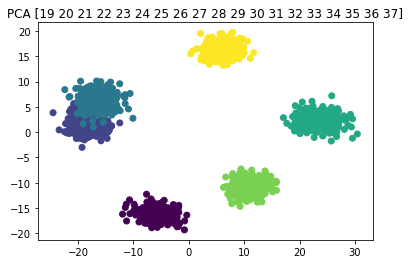

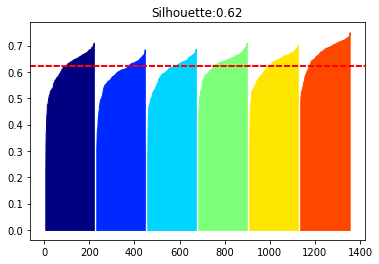

COV 0.6 


/tf/notebooks/discoverS_draft/scripts/data_generator.py:163: RuntimeWarning: covariance is not positive-semidefinite.
  arr = np.random.multivariate_normal(centers[cluster], d_covs[cluster], ns[cluster])


ARI  1.0, std 5


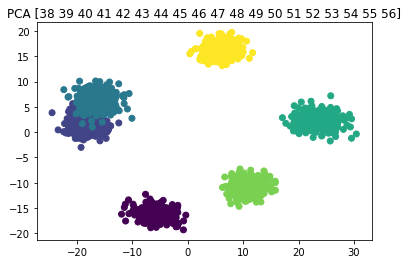

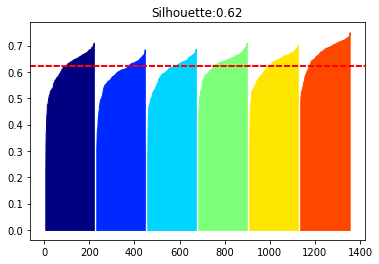

Total: (1300, 462), uniform (1300, 200) , normal (1300, 200),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.21 sec
Entropy computation 0.5 sec
KNN computation 0.01 sec
Sorting and thresholds 0.02 sec
Performing hierarchical clustering...
Hierarchical clustering 0.11 sec
Handle redundant features 0.02 sec
Returning 2 redundant features and  13 important features
*** Exploring 2D feature space with NN ...
handle_close_important (80, 3), total 808, 0.11380831152200699
relevant_features 284 => computing 1668 
trimming 1069 to 2
handle_important_features (82, 3),  total 1668, 0.11380831152200699
irrelevant_features 176 => computing 521
handle_not_important_features (88, 3), total 521, 0.11380831152200699
handle_all_features 460 => computing 1369


  0%|          | 0/21 [00:00<?, ?it/s]

handle_all_features (435, 3),  total 1369, 0.11380831152200699
Returning (435, 3), explored a total of 4366 feature pairs
*** Optimization algorithm 
Non redundant features 460, orig size 462, nb imp : 13
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:55<03:51, 13.62s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[7, 45]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.417109,2.0,"Counter({1: 865, 0: 435})"


Selecting (11, 4) from archive


 38%|███▊      | 8/21 [01:32<02:05,  9.62s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[7, 45]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.417109,2.0,"Counter({1: 865, 0: 435})"
1,"[16, 35, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.404995,3.0,"Counter({1: 659, 0: 641})"


Selecting (2, 4) from archive


 57%|█████▋    | 12/21 [02:10<01:21,  9.03s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[7, 45]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.417109,2.0,"Counter({1: 865, 0: 435})"
1,"[16, 35, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.404995,3.0,"Counter({1: 659, 0: 641})"
2,"[0, 5, 19, 24, 38, 42, 43]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.379847,7.0,"Counter({1: 868, 0: 432})"


Selecting (28, 4) from archive


 76%|███████▌  | 16/21 [02:52<00:46,  9.34s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[7, 45]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.417109,2.0,"Counter({1: 865, 0: 435})"
1,"[16, 35, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.404995,3.0,"Counter({1: 659, 0: 641})"
2,"[0, 5, 19, 24, 38, 42, 43]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.379847,7.0,"Counter({1: 868, 0: 432})"
3,"[26, 47]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.369093,2.0,"Counter({1: 868, 0: 432})"


Selecting (26, 4) from archive


 95%|█████████▌| 20/21 [03:30<00:09,  9.21s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[7, 45]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.417109,2.0,"Counter({1: 865, 0: 435})"
1,"[16, 35, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.404995,3.0,"Counter({1: 659, 0: 641})"
2,"[0, 5, 19, 24, 38, 42, 43]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.379847,7.0,"Counter({1: 868, 0: 432})"
3,"[26, 47]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.369093,2.0,"Counter({1: 868, 0: 432})"
4,"[12, 31, 50]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.342439,3.0,"Counter({1: 1080, 0: 220})"


Selecting (26, 4) from archive


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 460, orig size 462, nb imp : 13
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:32<02:20,  8.29s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.325674,"[0, 4, 5, 6, 19, 23, 24, 25, 38, 42, 43, 44, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",13.0,"Counter({1: 868, 0: 432})"


Selecting (28, 4) from archive


 38%|███▊      | 8/21 [01:29<02:27, 11.32s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.325674,"[0, 4, 5, 6, 19, 23, 24, 25, 38, 42, 43, 44, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",13.0,"Counter({1: 868, 0: 432})"
1,0.303746,"[16, 35, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3.0,"Counter({1: 659, 0: 641})"


Selecting (4, 4) from archive


 57%|█████▋    | 12/21 [02:34<02:11, 14.58s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.325674,"[0, 4, 5, 6, 19, 23, 24, 25, 38, 42, 43, 44, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",13.0,"Counter({1: 868, 0: 432})"
1,0.303746,"[16, 35, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3.0,"Counter({1: 659, 0: 641})"
2,0.278073,"[7, 26]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2.0,"Counter({1: 865, 0: 435})"


Selecting (5, 4) from archive


 76%|███████▌  | 16/21 [03:28<01:04, 12.85s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.325674,"[0, 4, 5, 6, 19, 23, 24, 25, 38, 42, 43, 44, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",13.0,"Counter({1: 868, 0: 432})"
1,0.303746,"[16, 35, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3.0,"Counter({1: 659, 0: 641})"
2,0.278073,"[7, 26]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2.0,"Counter({1: 865, 0: 435})"
3,0.268485,"[9, 12, 15, 18, 28, 31, 34, 47, 50, 53]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",10.0,"Counter({1: 1084, 0: 216})"


Selecting (49, 4) from archive


 95%|█████████▌| 20/21 [04:20<00:12, 12.10s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.325674,"[0, 4, 5, 6, 19, 23, 24, 25, 38, 42, 43, 44, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",13.0,"Counter({1: 868, 0: 432})"
1,0.303746,"[16, 35, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3.0,"Counter({1: 659, 0: 641})"
2,0.278073,"[7, 26]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2.0,"Counter({1: 865, 0: 435})"
3,0.268485,"[9, 12, 15, 18, 28, 31, 34, 47, 50, 53]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",10.0,"Counter({1: 1084, 0: 216})"
4,0.212645,"[13, 32, 33, 51, 52]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5.0,"Counter({0: 648, 1: 643, -1: 9})"


Selecting (29, 4) from archive


100%|██████████| 21/21 [04:47<00:00, 13.67s/it]


,adapted_ratkowsky_lance,features,partition,size,structure
0,0.325674,"[0, 4, 5, 6, 19, 23, 24, 25, 38, 42, 43, 44, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",13.0,"Counter({1: 868, 0: 432})"
1,0.303746,"[16, 35, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3.0,"Counter({1: 659, 0: 641})"
2,0.278073,"[7, 26]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2.0,"Counter({1: 865, 0: 435})"
3,0.268485,"[9, 12, 15, 18, 28, 31, 34, 47, 50, 53]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",10.0,"Counter({1: 1084, 0: 216})"
4,0.212645,"[13, 32, 33, 51, 52]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5.0,"Counter({0: 648, 1: 643, -1: 9})"


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 460, orig size 462, nb imp : 13
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [01:36<06:55, 24.46s/it]

,features,partition,silhouette,size,structure
0,"[32, 51, 457]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1,...",0.736659,3.0,"Counter({1: 654, 0: 641, -1: 5})"


Selecting (1, 4) from archive


 38%|███▊      | 8/21 [03:09<04:32, 20.95s/it]

,features,partition,silhouette,size,structure
0,"[32, 51, 457]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1,...",0.736659,3.0,"Counter({1: 654, 0: 641, -1: 5})"
1,"[7, 26]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.736103,2.0,"Counter({1: 865, 0: 435})"


Selecting (27, 4) from archive


 57%|█████▋    | 12/21 [04:27<02:56, 19.65s/it]

,features,partition,silhouette,size,structure
0,"[32, 51, 457]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1,...",0.736659,3.0,"Counter({1: 654, 0: 641, -1: 5})"
1,"[7, 26]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.736103,2.0,"Counter({1: 865, 0: 435})"
2,"[16, 35, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.695008,3.0,"Counter({1: 659, 0: 641})"


Selecting (18, 4) from archive


 76%|███████▌  | 16/21 [05:51<01:39, 19.88s/it]

,features,partition,silhouette,size,structure
0,"[32, 51, 457]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1,...",0.736659,3.0,"Counter({1: 654, 0: 641, -1: 5})"
1,"[7, 26]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.736103,2.0,"Counter({1: 865, 0: 435})"
2,"[16, 35, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.695008,3.0,"Counter({1: 659, 0: 641})"
3,"[12, 31, 47, 50]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.678786,4.0,"Counter({1: 1084, 0: 216})"


Selecting (39, 4) from archive


 95%|█████████▌| 20/21 [07:34<00:21, 21.75s/it]

,features,partition,silhouette,size,structure
0,"[32, 51, 457]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1,...",0.736659,3.0,"Counter({1: 654, 0: 641, -1: 5})"
1,"[7, 26]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.736103,2.0,"Counter({1: 865, 0: 435})"
2,"[16, 35, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.695008,3.0,"Counter({1: 659, 0: 641})"
3,"[12, 31, 47, 50]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.678786,4.0,"Counter({1: 1084, 0: 216})"
4,"[0, 5, 19, 24, 38, 42, 43]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.669021,7.0,"Counter({1: 868, 0: 432})"


Selecting (50, 4) from archive


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 460, orig size 462, nb imp : 13
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [01:12<05:19, 18.79s/it]

,adapted_silhouette,features,partition,size,structure
0,0.595616,"[0, 3, 4, 5, 13, 19, 22, 23, 24, 32, 33, 38, 4...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",18.0,"Counter({2: 648, 1: 432, 0: 220})"


Selecting (45, 4) from archive


 38%|███▊      | 8/21 [03:37<06:17, 29.04s/it]

,adapted_silhouette,features,partition,size,structure
0,0.595616,"[0, 3, 4, 5, 13, 19, 22, 23, 24, 32, 33, 38, 4...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",18.0,"Counter({2: 648, 1: 432, 0: 220})"
1,0.621985,"[1, 2, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18,...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",36.0,"Counter({5: 220, 3: 216, 1: 216, 2: 216, 0: 21..."


Selecting (50, 4) from archive


 57%|█████▋    | 12/21 [06:52<05:12, 34.67s/it]

,adapted_silhouette,features,partition,size,structure
0,0.595616,"[0, 3, 4, 5, 13, 19, 22, 23, 24, 32, 33, 38, 4...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",18.0,"Counter({2: 648, 1: 432, 0: 220})"
1,0.621985,"[1, 2, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18,...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",36.0,"Counter({5: 220, 3: 216, 1: 216, 2: 216, 0: 21..."
2,0.456362,"[12, 31]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2.0,"Counter({1: 1082, 0: 218})"


Selecting (4, 4) from archive


 76%|███████▌  | 16/21 [08:43<02:19, 27.89s/it]

,adapted_silhouette,features,partition,size,structure
0,0.595616,"[0, 3, 4, 5, 13, 19, 22, 23, 24, 32, 33, 38, 4...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",18.0,"Counter({2: 648, 1: 432, 0: 220})"
1,0.621985,"[1, 2, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18,...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",36.0,"Counter({5: 220, 3: 216, 1: 216, 2: 216, 0: 21..."
2,0.456362,"[12, 31]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2.0,"Counter({1: 1082, 0: 218})"
3,0.046314,"[107, 458]","[3, 0, 0, -1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0,...",2.0,"Counter({0: 860, -1: 301, 3: 76, 1: 42, 2: 21})"


Selecting (2, 4) from archive


 95%|█████████▌| 20/21 [10:21<00:24, 24.61s/it]

,adapted_silhouette,features,partition,size,structure
0,0.595616,"[0, 3, 4, 5, 13, 19, 22, 23, 24, 32, 33, 38, 4...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",18.0,"Counter({2: 648, 1: 432, 0: 220})"
1,0.621985,"[1, 2, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18,...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",36.0,"Counter({5: 220, 3: 216, 1: 216, 2: 216, 0: 21..."
2,0.456362,"[12, 31]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2.0,"Counter({1: 1082, 0: 218})"
3,0.046314,"[107, 458]","[3, 0, 0, -1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0,...",2.0,"Counter({0: 860, -1: 301, 3: 76, 1: 42, 2: 21})"
4,0.026859,"[108, 209]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2.0,"Counter({1: 1208, -1: 79, 0: 13})"


Selecting (3, 4) from archive


100%|██████████| 21/21 [10:57<00:00, 31.30s/it]


COV 0.6 
ARI  1.0, std 5


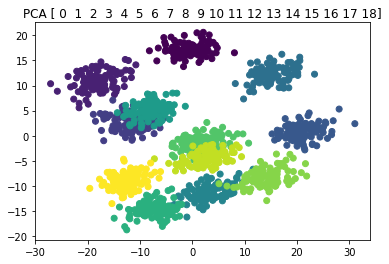

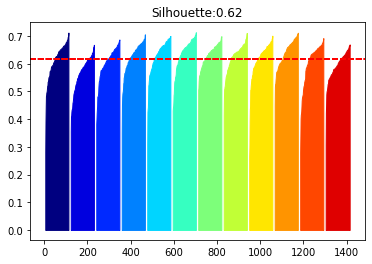

COV 0.6 
ARI  1.0, std 5


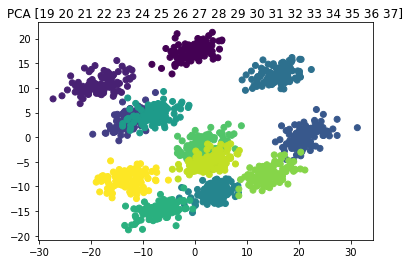

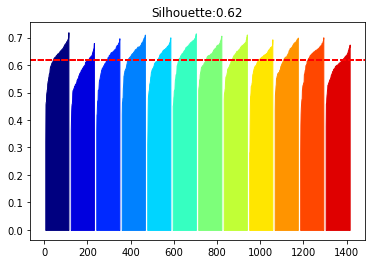

COV 0.6 
ARI  1.0, std 5


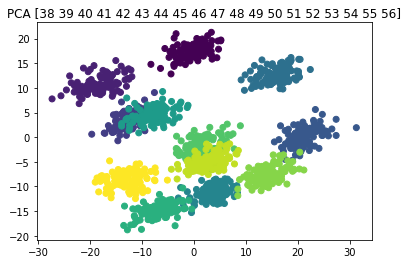

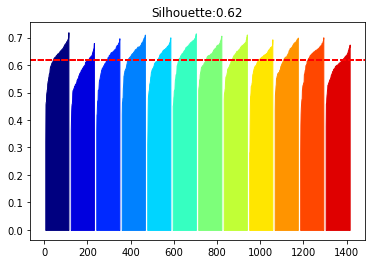

Total: (1300, 462), uniform (1300, 200) , normal (1300, 200),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.25 sec
Entropy computation 0.77 sec
KNN computation 0.01 sec
Sorting and thresholds 0.04 sec
Performing hierarchical clustering...
Hierarchical clustering 0.1 sec
Handle redundant features 0.04 sec
Returning 1 redundant features and  14 important features
*** Exploring 2D feature space with NN ...
handle_close_important (0, 3), total 802, nan
relevant_features 285 => computing 1677 
handle_important_features (0, 3),  total 1677, nan
irrelevant_features 176 => computing 521
handle_not_important_features (0, 3), total 521, nan
handle_all_features 461 => computing 1367


  0%|          | 0/21 [00:00<?, ?it/s]

handle_all_features (0, 3),  total 1367, nan
Returning (0, 3), explored a total of 4367 feature pairs
*** Optimization algorithm 
Non redundant features 461, orig size 462, nb imp : 14
adding 50 random population


 19%|█▉        | 4/21 [01:06<04:41, 16.58s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 13, 32, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.358387,4.0,"Counter({1: 760, 0: 540})"


adding 34 random population


 38%|███▊      | 8/21 [03:02<05:35, 25.79s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 13, 32, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.358387,4.0,"Counter({1: 760, 0: 540})"
1,"[5, 19, 24, 43]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.332938,4.0,"Counter({1: 972, 0: 328})"


adding 20 random population


 57%|█████▋    | 12/21 [04:26<03:12, 21.41s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 13, 32, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.358387,4.0,"Counter({1: 760, 0: 540})"
1,"[5, 19, 24, 43]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.332938,4.0,"Counter({1: 972, 0: 328})"
2,"[8, 17, 36, 55]","[1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, ...",0.142140,4.0,"Counter({1: 855, 0: 267, -1: 178})"


adding 5 random population


 76%|███████▌  | 16/21 [06:00<01:45, 21.07s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 13, 32, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.358387,4.0,"Counter({1: 760, 0: 540})"
1,"[5, 19, 24, 43]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.332938,4.0,"Counter({1: 972, 0: 328})"
2,"[8, 17, 36, 55]","[1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, ...",0.142140,4.0,"Counter({1: 855, 0: 267, -1: 178})"
3,"[15, 34, 38, 53]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.214083,4.0,"Counter({0: 646, 1: 629, -1: 25})"


adding 16 random population


 95%|█████████▌| 20/21 [07:30<00:20, 20.86s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 13, 32, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.358387,4.0,"Counter({1: 760, 0: 540})"
1,"[5, 19, 24, 43]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.332938,4.0,"Counter({1: 972, 0: 328})"
2,"[8, 17, 36, 55]","[1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, ...",0.142140,4.0,"Counter({1: 855, 0: 267, -1: 178})"
3,"[15, 34, 38, 53]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.214083,4.0,"Counter({0: 646, 1: 629, -1: 25})"
4,"[1, 7, 20, 26, 31, 39, 45, 50]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.204149,8.0,"Counter({1: 972, 0: 328})"


adding 15 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 461, orig size 462, nb imp : 14
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
adding 50 random population


 19%|█▉        | 4/21 [01:06<04:48, 16.99s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.181378,"[13, 32, 33, 40, 51, 52, 193, 284]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.0,"Counter({1: 760, 0: 540})"


adding 32 random population


 38%|███▊      | 8/21 [02:34<03:53, 17.97s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.181378,"[13, 32, 33, 40, 51, 52, 193, 284]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.0,"Counter({1: 760, 0: 540})"
1,0.178711,"[0, 19, 38]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3.0,"Counter({1: 841, 0: 412, -1: 47})"


adding 32 random population


 57%|█████▋    | 12/21 [03:32<02:14, 14.95s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.181378,"[13, 32, 33, 40, 51, 52, 193, 284]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.0,"Counter({1: 760, 0: 540})"
1,0.178711,"[0, 19, 38]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3.0,"Counter({1: 841, 0: 412, -1: 47})"
2,0.142571,"[2, 21, 27, 46, 457]","[-1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...",5.0,"Counter({0: 930, 1: 308, -1: 62})"


adding 33 random population


 76%|███████▌  | 16/21 [04:37<01:16, 15.37s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.181378,"[13, 32, 33, 40, 51, 52, 193, 284]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.0,"Counter({1: 760, 0: 540})"
1,0.178711,"[0, 19, 38]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3.0,"Counter({1: 841, 0: 412, -1: 47})"
2,0.142571,"[2, 21, 27, 46, 457]","[-1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...",5.0,"Counter({0: 930, 1: 308, -1: 62})"
3,0.179264,"[7, 9, 10, 15, 26, 28, 34, 45, 47, 53]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",10.0,"Counter({1: 648, 2: 544, 0: 108})"


adding 45 random population


 95%|█████████▌| 20/21 [05:59<00:16, 16.03s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.181378,"[13, 32, 33, 40, 51, 52, 193, 284]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.0,"Counter({1: 760, 0: 540})"
1,0.178711,"[0, 19, 38]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3.0,"Counter({1: 841, 0: 412, -1: 47})"
2,0.142571,"[2, 21, 27, 46, 457]","[-1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...",5.0,"Counter({0: 930, 1: 308, -1: 62})"
3,0.179264,"[7, 9, 10, 15, 26, 28, 34, 45, 47, 53]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",10.0,"Counter({1: 648, 2: 544, 0: 108})"
4,0.165521,"[11, 16, 35, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.0,"Counter({1: 966, 0: 321, -1: 13})"


adding 35 random population


100%|██████████| 21/21 [06:18<00:00, 18.04s/it]


,adapted_ratkowsky_lance,features,partition,size,structure
0,0.181378,"[13, 32, 33, 40, 51, 52, 193, 284]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.0,"Counter({1: 760, 0: 540})"
1,0.178711,"[0, 19, 38]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3.0,"Counter({1: 841, 0: 412, -1: 47})"
2,0.142571,"[2, 21, 27, 46, 457]","[-1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...",5.0,"Counter({0: 930, 1: 308, -1: 62})"
3,0.179264,"[7, 9, 10, 15, 26, 28, 34, 45, 47, 53]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",10.0,"Counter({1: 648, 2: 544, 0: 108})"
4,0.165521,"[11, 16, 35, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.0,"Counter({1: 966, 0: 321, -1: 13})"


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 461, orig size 462, nb imp : 14
adding 50 random population


 19%|█▉        | 4/21 [01:20<05:50, 20.64s/it]

,features,partition,silhouette,size,structure
0,"[0, 5, 19, 24, 38, 43]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.610258,6.0,"Counter({1: 972, 0: 328})"


adding 22 random population


 38%|███▊      | 8/21 [04:01<07:01, 32.44s/it]

,features,partition,silhouette,size,structure
0,"[0, 5, 19, 24, 38, 43]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.610258,6.0,"Counter({1: 972, 0: 328})"
1,"[1, 2, 3, 4, 6, 8, 10, 12, 15, 16, 17, 20, 21,...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",0.603167,39.0,"Counter({8: 112, 4: 108, 10: 108, 9: 108, 1: 1..."


adding 48 random population


 57%|█████▋    | 12/21 [08:40<06:41, 44.62s/it]

,features,partition,silhouette,size,structure
0,"[0, 5, 19, 24, 38, 43]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.610258,6.0,"Counter({1: 972, 0: 328})"
1,"[1, 2, 3, 4, 6, 8, 10, 12, 15, 16, 17, 20, 21,...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",0.603167,39.0,"Counter({8: 112, 4: 108, 10: 108, 9: 108, 1: 1..."
2,"[13, 14]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.550745,2.0,"Counter({2: 640, 1: 529, 0: 104, -1: 27})"


adding 19 random population


 76%|███████▌  | 16/21 [10:51<02:49, 33.99s/it]

,features,partition,silhouette,size,structure
0,"[0, 5, 19, 24, 38, 43]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.610258,6.0,"Counter({1: 972, 0: 328})"
1,"[1, 2, 3, 4, 6, 8, 10, 12, 15, 16, 17, 20, 21,...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",0.603167,39.0,"Counter({8: 112, 4: 108, 10: 108, 9: 108, 1: 1..."
2,"[13, 14]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.550745,2.0,"Counter({2: 640, 1: 529, 0: 104, -1: 27})"
3,"[7, 9, 26, 47]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.567733,4.0,"Counter({1: 652, 0: 648})"


adding 21 random population


 95%|█████████▌| 20/21 [13:06<00:28, 28.95s/it]

,features,partition,silhouette,size,structure
0,"[0, 5, 19, 24, 38, 43]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.610258,6.0,"Counter({1: 972, 0: 328})"
1,"[1, 2, 3, 4, 6, 8, 10, 12, 15, 16, 17, 20, 21,...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",0.603167,39.0,"Counter({8: 112, 4: 108, 10: 108, 9: 108, 1: 1..."
2,"[13, 14]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.550745,2.0,"Counter({2: 640, 1: 529, 0: 104, -1: 27})"
3,"[7, 9, 26, 47]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.567733,4.0,"Counter({1: 652, 0: 648})"
4,"[263, 394]","[-1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0.121782,2.0,"Counter({0: 1068, -1: 217, 1: 15})"


adding 31 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 461, orig size 462, nb imp : 14
adding 50 random population


 19%|█▉        | 4/21 [01:18<05:40, 20.05s/it]

,adapted_silhouette,features,partition,size,structure
0,0.521537,"[13, 19, 32, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.0,"Counter({1: 760, 0: 540})"


adding 38 random population


 38%|███▊      | 8/21 [03:00<04:55, 22.72s/it]

,adapted_silhouette,features,partition,size,structure
0,0.521537,"[13, 19, 32, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.0,"Counter({1: 760, 0: 540})"
1,0.495655,"[0, 2, 3, 4, 8, 11, 14, 15, 18, 21, 22, 23, 33...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",20.0,"Counter({11: 111, 3: 108, 4: 108, 10: 108, 9: ..."


adding 48 random population


 57%|█████▋    | 12/21 [05:08<03:57, 26.41s/it]

,adapted_silhouette,features,partition,size,structure
0,0.521537,"[13, 19, 32, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.0,"Counter({1: 760, 0: 540})"
1,0.495655,"[0, 2, 3, 4, 8, 11, 14, 15, 18, 21, 22, 23, 33...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",20.0,"Counter({11: 111, 3: 108, 4: 108, 10: 108, 9: ..."
2,0.527312,"[1, 7, 10, 16, 20, 26, 27, 29, 31, 35, 36, 39,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",18.0,"Counter({3: 111, 5: 108, 0: 108, 1: 108, 6: 10..."


adding 33 random population


 76%|███████▌  | 16/21 [07:52<02:29, 29.99s/it]

,adapted_silhouette,features,partition,size,structure
0,0.521537,"[13, 19, 32, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.0,"Counter({1: 760, 0: 540})"
1,0.495655,"[0, 2, 3, 4, 8, 11, 14, 15, 18, 21, 22, 23, 33...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",20.0,"Counter({11: 111, 3: 108, 4: 108, 10: 108, 9: ..."
2,0.527312,"[1, 7, 10, 16, 20, 26, 27, 29, 31, 35, 36, 39,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",18.0,"Counter({3: 111, 5: 108, 0: 108, 1: 108, 6: 10..."
3,0.410332,"[6, 24, 25, 43]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",4.0,"Counter({1: 852, 0: 423, -1: 25})"


adding 22 random population


 95%|█████████▌| 20/21 [09:22<00:22, 22.24s/it]

,adapted_silhouette,features,partition,size,structure
0,0.521537,"[13, 19, 32, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.0,"Counter({1: 760, 0: 540})"
1,0.495655,"[0, 2, 3, 4, 8, 11, 14, 15, 18, 21, 22, 23, 33...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",20.0,"Counter({11: 111, 3: 108, 4: 108, 10: 108, 9: ..."
2,0.527312,"[1, 7, 10, 16, 20, 26, 27, 29, 31, 35, 36, 39,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",18.0,"Counter({3: 111, 5: 108, 0: 108, 1: 108, 6: 10..."
3,0.410332,"[6, 24, 25, 43]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",4.0,"Counter({1: 852, 0: 423, -1: 25})"
4,0.315630,"[28, 34, 47, 53]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",4.0,"Counter({1: 1160, 0: 91, -1: 49})"


adding 7 random population


100%|██████████| 21/21 [10:00<00:00, 28.58s/it]


>> std 8
COV 0.9 
ARI  1.0, std 8


/tf/notebooks/discoverS_draft/scripts/data_generator.py:163: RuntimeWarning: covariance is not positive-semidefinite.
  arr = np.random.multivariate_normal(centers[cluster], d_covs[cluster], ns[cluster])


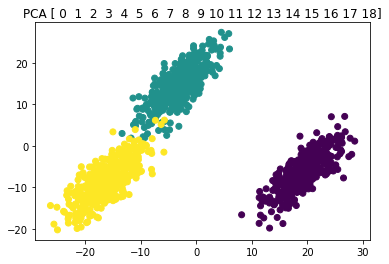

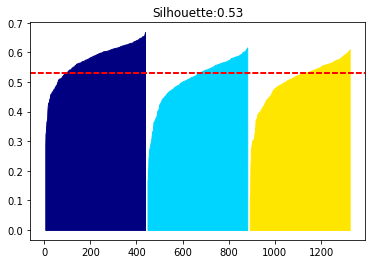

COV 0.9 


/tf/notebooks/discoverS_draft/scripts/data_generator.py:163: RuntimeWarning: covariance is not positive-semidefinite.
  arr = np.random.multivariate_normal(centers[cluster], d_covs[cluster], ns[cluster])


ARI  1.0, std 8


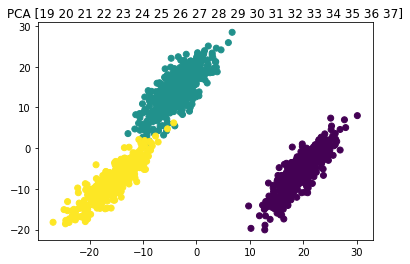

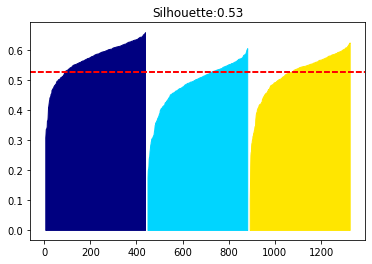

COV 0.9 
ARI  1.0, std 8


/tf/notebooks/discoverS_draft/scripts/data_generator.py:163: RuntimeWarning: covariance is not positive-semidefinite.
  arr = np.random.multivariate_normal(centers[cluster], d_covs[cluster], ns[cluster])


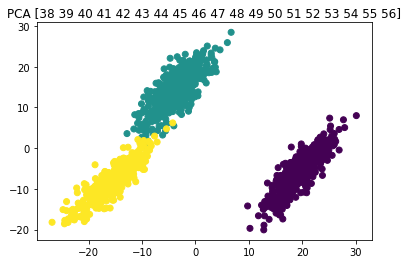

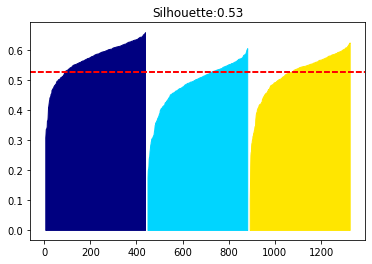

Total: (1300, 462), uniform (1300, 200) , normal (1300, 200),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.27 sec
Entropy computation 0.51 sec
KNN computation 0.01 sec
Sorting and thresholds 0.02 sec
Performing hierarchical clustering...
Hierarchical clustering 0.1 sec
Handle redundant features 0.02 sec
Returning 0 redundant features and  21 important features
*** Exploring 2D feature space with NN ...
trimming 789 to 231
handle_close_important (231, 3), total 789, 0.20719227194786072
relevant_features 280 => computing 1638 
trimming 1633 to 0
handle_important_features (231, 3),  total 1638, 0.20719227194786072
irrelevant_features 182 => computing 528
trimming 528 to 231
handle_not_important_features (462, 3), total 528, 0.20719227194786072
handl

  0%|          | 0/21 [00:00<?, ?it/s]

trimming 1366 to 462
handle_all_features (924, 3),  total 1373, 0.20719227194786072
Returning (924, 3), explored a total of 4328 feature pairs
*** Optimization algorithm 
Non redundant features 462, orig size 462, nb imp : 21
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:50<03:40, 12.97s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[8, 27, 36, 46]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.414842,4.0,"Counter({0: 867, 1: 433})"


Selecting (21, 4) from archive


 38%|███▊      | 8/21 [02:30<04:26, 20.51s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[8, 27, 36, 46]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.414842,4.0,"Counter({0: 867, 1: 433})"
1,"[7, 35, 45, 54]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.373798,4.0,"Counter({1: 867, 0: 433})"


Selecting (21, 4) from archive


 57%|█████▋    | 12/21 [04:05<03:15, 21.72s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[8, 27, 36, 46]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.414842,4.0,"Counter({0: 867, 1: 433})"
1,"[7, 35, 45, 54]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.373798,4.0,"Counter({1: 867, 0: 433})"
2,"[0, 5, 10, 13, 14, 24, 32, 33, 43, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.364891,10.0,"Counter({1: 867, 0: 433})"


Selecting (50, 4) from archive


 76%|███████▌  | 16/21 [05:52<01:54, 22.91s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[8, 27, 36, 46]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.414842,4.0,"Counter({0: 867, 1: 433})"
1,"[7, 35, 45, 54]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.373798,4.0,"Counter({1: 867, 0: 433})"
2,"[0, 5, 10, 13, 14, 24, 32, 33, 43, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.364891,10.0,"Counter({1: 867, 0: 433})"
3,"[4, 16, 17, 29, 48, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.273654,6.0,"Counter({1: 867, 0: 433})"


Selecting (47, 4) from archive


 95%|█████████▌| 20/21 [07:29<00:22, 22.68s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[8, 27, 36, 46]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.414842,4.0,"Counter({0: 867, 1: 433})"
1,"[7, 35, 45, 54]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.373798,4.0,"Counter({1: 867, 0: 433})"
2,"[0, 5, 10, 13, 14, 24, 32, 33, 43, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.364891,10.0,"Counter({1: 867, 0: 433})"
3,"[4, 16, 17, 29, 48, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.273654,6.0,"Counter({1: 867, 0: 433})"
4,"[21, 26]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.306963,2.0,"Counter({0: 867, 1: 433})"


Selecting (50, 4) from archive


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 462, orig size 462, nb imp : 21
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [01:12<05:15, 18.53s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.340485,"[8, 17, 27, 36, 46, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.0,"Counter({0: 867, 1: 433})"


Selecting (29, 4) from archive


 38%|███▊      | 8/21 [02:54<04:49, 22.29s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.340485,"[8, 17, 27, 36, 46, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.0,"Counter({0: 867, 1: 433})"
1,0.318759,"[0, 4, 5, 10, 13, 14, 19, 24, 29, 32, 33, 38, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",17.0,"Counter({1: 867, 0: 433})"


Selecting (50, 4) from archive


 57%|█████▋    | 12/21 [04:46<03:04, 20.49s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.340485,"[8, 17, 27, 36, 46, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.0,"Counter({0: 867, 1: 433})"
1,0.318759,"[0, 4, 5, 10, 13, 14, 19, 24, 29, 32, 33, 38, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",17.0,"Counter({1: 867, 0: 433})"
2,0.295295,"[1, 7, 16, 20, 26, 35, 45]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",7.0,"Counter({1: 867, 0: 433})"


Selecting (50, 4) from archive


 76%|███████▌  | 16/21 [05:38<01:06, 13.37s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.340485,"[8, 17, 27, 36, 46, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.0,"Counter({0: 867, 1: 433})"
1,0.318759,"[0, 4, 5, 10, 13, 14, 19, 24, 29, 32, 33, 38, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",17.0,"Counter({1: 867, 0: 433})"
2,0.295295,"[1, 7, 16, 20, 26, 35, 45]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",7.0,"Counter({1: 867, 0: 433})"
3,0.075197,"[2, 6, 9, 21, 23, 25, 28, 40, 42, 44, 47, 271,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1,...",13.0,"Counter({1: 768, 0: 368, -1: 164})"


Selecting (2, 4) from archive


 95%|█████████▌| 20/21 [06:57<00:14, 14.35s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.340485,"[8, 17, 27, 36, 46, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.0,"Counter({0: 867, 1: 433})"
1,0.318759,"[0, 4, 5, 10, 13, 14, 19, 24, 29, 32, 33, 38, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",17.0,"Counter({1: 867, 0: 433})"
2,0.295295,"[1, 7, 16, 20, 26, 35, 45]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",7.0,"Counter({1: 867, 0: 433})"
3,0.075197,"[2, 6, 9, 21, 23, 25, 28, 40, 42, 44, 47, 271,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1,...",13.0,"Counter({1: 768, 0: 368, -1: 164})"
4,0.030360,"[123, 144, 295]","[0, -1, 1, 2, -1, -1, -1, 0, -1, 0, -1, -1, 2,...",3.0,"Counter({-1: 839, 2: 228, 0: 131, 1: 102})"


Selecting (1, 4) from archive


100%|██████████| 21/21 [07:10<00:00, 20.50s/it]


,adapted_ratkowsky_lance,features,partition,size,structure
0,0.340485,"[8, 17, 27, 36, 46, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.0,"Counter({0: 867, 1: 433})"
1,0.318759,"[0, 4, 5, 10, 13, 14, 19, 24, 29, 32, 33, 38, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",17.0,"Counter({1: 867, 0: 433})"
2,0.295295,"[1, 7, 16, 20, 26, 35, 45]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",7.0,"Counter({1: 867, 0: 433})"
3,0.075197,"[2, 6, 9, 21, 23, 25, 28, 40, 42, 44, 47, 271,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1,...",13.0,"Counter({1: 768, 0: 368, -1: 164})"
4,0.030360,"[123, 144, 295]","[0, -1, 1, 2, -1, -1, -1, 0, -1, 0, -1, -1, 2,...",3.0,"Counter({-1: 839, 2: 228, 0: 131, 1: 102})"


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 462, orig size 462, nb imp : 21
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [01:10<05:06, 18.04s/it]

,features,partition,silhouette,size,structure
0,"[8, 27, 46, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.728864,4.0,"Counter({0: 867, 1: 433})"


Selecting (20, 4) from archive


 38%|███▊      | 8/21 [02:38<04:06, 18.97s/it]

,features,partition,silhouette,size,structure
0,"[8, 27, 46, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.728864,4.0,"Counter({0: 867, 1: 433})"
1,"[5, 13, 14, 24, 43]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.669738,5.0,"Counter({1: 867, 0: 433})"


Selecting (41, 4) from archive


 57%|█████▋    | 12/21 [04:09<02:56, 19.60s/it]

,features,partition,silhouette,size,structure
0,"[8, 27, 46, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.728864,4.0,"Counter({0: 867, 1: 433})"
1,"[5, 13, 14, 24, 43]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.669738,5.0,"Counter({1: 867, 0: 433})"
2,"[7, 26, 33, 36, 45, 52, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.673066,7.0,"Counter({2: 434, 0: 433, 1: 433})"


Selecting (48, 4) from archive


 76%|███████▌  | 16/21 [05:44<01:43, 20.70s/it]

,features,partition,silhouette,size,structure
0,"[8, 27, 46, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.728864,4.0,"Counter({0: 867, 1: 433})"
1,"[5, 13, 14, 24, 43]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.669738,5.0,"Counter({1: 867, 0: 433})"
2,"[7, 26, 33, 36, 45, 52, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.673066,7.0,"Counter({2: 434, 0: 433, 1: 433})"
3,"[10, 19, 32, 38, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.626306,5.0,"Counter({1: 867, 0: 433})"


Selecting (43, 4) from archive


 95%|█████████▌| 20/21 [07:10<00:20, 20.04s/it]

,features,partition,silhouette,size,structure
0,"[8, 27, 46, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.728864,4.0,"Counter({0: 867, 1: 433})"
1,"[5, 13, 14, 24, 43]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.669738,5.0,"Counter({1: 867, 0: 433})"
2,"[7, 26, 33, 36, 45, 52, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.673066,7.0,"Counter({2: 434, 0: 433, 1: 433})"
3,"[10, 19, 32, 38, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.626306,5.0,"Counter({1: 867, 0: 433})"
4,"[6, 29, 48]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.533109,3.0,"Counter({1: 866, 0: 426, -1: 8})"


Selecting (24, 4) from archive


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 462, orig size 462, nb imp : 21
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [01:10<05:05, 17.98s/it]

,adapted_silhouette,features,partition,size,structure
0,0.600809,"[1, 4, 5, 7, 8, 10, 14, 16, 17, 24, 26, 27, 33...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",21.0,"Counter({2: 434, 0: 433, 1: 433})"


Selecting (50, 4) from archive


 38%|███▊      | 8/21 [03:29<05:40, 26.21s/it]

,adapted_silhouette,features,partition,size,structure
0,0.600809,"[1, 4, 5, 7, 8, 10, 14, 16, 17, 24, 26, 27, 33...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",21.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.520400,"[0, 6, 13, 19, 23, 25, 29, 32, 38, 42, 44, 48,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13.0,"Counter({1: 867, 0: 433})"


Selecting (50, 4) from archive


 57%|█████▋    | 12/21 [05:37<03:51, 25.70s/it]

,adapted_silhouette,features,partition,size,structure
0,0.600809,"[1, 4, 5, 7, 8, 10, 14, 16, 17, 24, 26, 27, 33...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",21.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.520400,"[0, 6, 13, 19, 23, 25, 29, 32, 38, 42, 44, 48,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13.0,"Counter({1: 867, 0: 433})"
2,0.146702,"[20, 39]","[33, -1, -1, -1, 33, 15, 25, -1, 15, -1, 24, 2...",2.0,"Counter({-1: 321, 17: 70, 16: 67, 31: 50, 9: 4..."


Selecting (1, 4) from archive


 76%|███████▌  | 16/21 [06:59<01:47, 21.53s/it]

,adapted_silhouette,features,partition,size,structure
0,0.600809,"[1, 4, 5, 7, 8, 10, 14, 16, 17, 24, 26, 27, 33...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",21.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.520400,"[0, 6, 13, 19, 23, 25, 29, 32, 38, 42, 44, 48,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13.0,"Counter({1: 867, 0: 433})"
2,0.146702,"[20, 39]","[33, -1, -1, -1, 33, 15, 25, -1, 15, -1, 24, 2...",2.0,"Counter({-1: 321, 17: 70, 16: 67, 31: 50, 9: 4..."
3,0.108120,"[34, 53, 278]","[-1, 0, 0, 0, 0, -1, 0, 0, -1, 0, -1, 0, 0, 0,...",3.0,"Counter({0: 1039, -1: 251, 1: 10})"


Selecting (1, 4) from archive


 95%|█████████▌| 20/21 [09:10<00:27, 27.64s/it]

,adapted_silhouette,features,partition,size,structure
0,0.600809,"[1, 4, 5, 7, 8, 10, 14, 16, 17, 24, 26, 27, 33...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",21.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.520400,"[0, 6, 13, 19, 23, 25, 29, 32, 38, 42, 44, 48,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13.0,"Counter({1: 867, 0: 433})"
2,0.146702,"[20, 39]","[33, -1, -1, -1, 33, 15, 25, -1, 15, -1, 24, 2...",2.0,"Counter({-1: 321, 17: 70, 16: 67, 31: 50, 9: 4..."
3,0.108120,"[34, 53, 278]","[-1, 0, 0, 0, 0, -1, 0, 0, -1, 0, -1, 0, 0, 0,...",3.0,"Counter({0: 1039, -1: 251, 1: 10})"
4,0.185337,"[37, 56]","[34, 3, -1, 36, -1, 35, 3, 27, -1, -1, -1, -1,...",2.0,"Counter({-1: 305, 9: 77, 18: 50, 8: 48, 10: 47..."


Selecting (3, 4) from archive


100%|██████████| 21/21 [09:42<00:00, 27.72s/it]


COV 0.9 


/tf/notebooks/discoverS_draft/scripts/data_generator.py:163: RuntimeWarning: covariance is not positive-semidefinite.
  arr = np.random.multivariate_normal(centers[cluster], d_covs[cluster], ns[cluster])


ARI  1.0, std 8


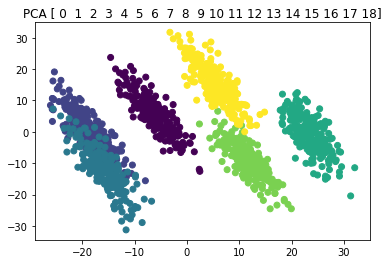

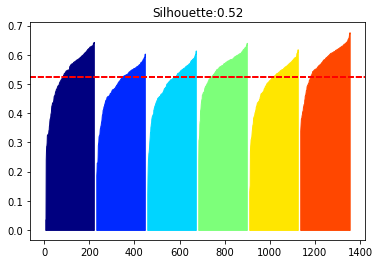

COV 0.9 


/tf/notebooks/discoverS_draft/scripts/data_generator.py:163: RuntimeWarning: covariance is not positive-semidefinite.
  arr = np.random.multivariate_normal(centers[cluster], d_covs[cluster], ns[cluster])


ARI  1.0, std 8


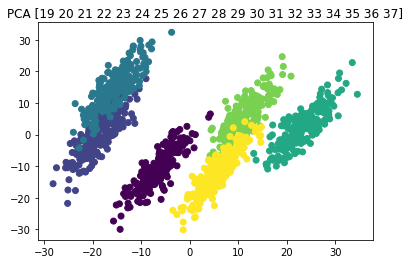

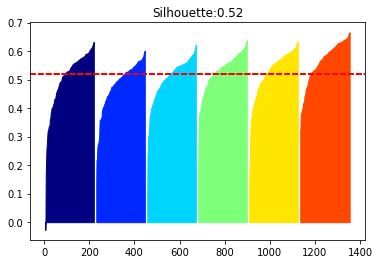

COV 0.9 


/tf/notebooks/discoverS_draft/scripts/data_generator.py:163: RuntimeWarning: covariance is not positive-semidefinite.
  arr = np.random.multivariate_normal(centers[cluster], d_covs[cluster], ns[cluster])


ARI  1.0, std 8


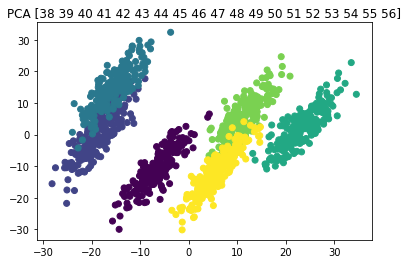

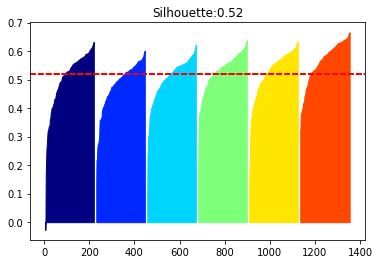

Total: (1300, 462), uniform (1300, 200) , normal (1300, 200),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.27 sec
Entropy computation 0.49 sec
KNN computation 0.01 sec
Sorting and thresholds 0.02 sec
Performing hierarchical clustering...
Hierarchical clustering 0.1 sec
Handle redundant features 0.02 sec
Returning 2 redundant features and  10 important features
*** Exploring 2D feature space with NN ...
handle_close_important (76, 3), total 808, 0.11296830326318741
relevant_features 286 => computing 1673 
trimming 1023 to 2
handle_important_features (78, 3),  total 1673, 0.11296830326318741
irrelevant_features 174 => computing 514
handle_not_important_features (85, 3), total 514, 0.11296830326318741
handle_all_features 460 => computing 1369


  0%|          | 0/21 [00:00<?, ?it/s]

handle_all_features (416, 3),  total 1369, 0.11296830326318741
Returning (416, 3), explored a total of 4364 feature pairs
*** Optimization algorithm 
Non redundant features 460, orig size 462, nb imp : 10
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:33<02:27,  8.66s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[15, 23, 34, 42, 53]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.330063,5.0,"Counter({1: 652, 0: 648})"


Selecting (25, 4) from archive


 38%|███▊      | 8/21 [01:10<01:53,  8.71s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[15, 23, 34, 42, 53]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.330063,5.0,"Counter({1: 652, 0: 648})"
1,"[0, 5, 24, 38, 43]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.349832,5.0,"Counter({1: 868, 0: 432})"


Selecting (19, 4) from archive


 57%|█████▋    | 12/21 [01:51<01:23,  9.23s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[15, 23, 34, 42, 53]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.330063,5.0,"Counter({1: 652, 0: 648})"
1,"[0, 5, 24, 38, 43]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.349832,5.0,"Counter({1: 868, 0: 432})"
2,"[13, 14, 32, 41, 51, 457]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.335204,6.0,"Counter({1: 652, 0: 648})"


Selecting (22, 4) from archive


 76%|███████▌  | 16/21 [02:37<00:50, 10.10s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[15, 23, 34, 42, 53]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.330063,5.0,"Counter({1: 652, 0: 648})"
1,"[0, 5, 24, 38, 43]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.349832,5.0,"Counter({1: 868, 0: 432})"
2,"[13, 14, 32, 41, 51, 457]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.335204,6.0,"Counter({1: 652, 0: 648})"
3,"[9, 12, 28, 31, 47, 50]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.285660,6.0,"Counter({1: 1083, 0: 217})"


Selecting (48, 4) from archive


 95%|█████████▌| 20/21 [03:20<00:09,  9.73s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[15, 23, 34, 42, 53]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.330063,5.0,"Counter({1: 652, 0: 648})"
1,"[0, 5, 24, 38, 43]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.349832,5.0,"Counter({1: 868, 0: 432})"
2,"[13, 14, 32, 41, 51, 457]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.335204,6.0,"Counter({1: 652, 0: 648})"
3,"[9, 12, 28, 31, 47, 50]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.285660,6.0,"Counter({1: 1083, 0: 217})"
4,"[16, 19, 35, 45, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.270410,5.0,"Counter({1: 652, 0: 648})"


Selecting (31, 4) from archive


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 460, orig size 462, nb imp : 10
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [01:04<04:37, 16.30s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.297712,"[0, 4, 5, 19, 23, 24, 38, 42, 43, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",10.0,"Counter({1: 868, 0: 432})"


Selecting (30, 4) from archive


 38%|███▊      | 8/21 [02:43<04:26, 20.51s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.297712,"[0, 4, 5, 19, 23, 24, 38, 42, 43, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",10.0,"Counter({1: 868, 0: 432})"
1,0.233424,"[9, 10, 12, 15, 28, 29, 31, 34, 47, 49, 50, 53...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",13.0,"Counter({1: 1084, 0: 216})"


Selecting (41, 4) from archive


 57%|█████▋    | 12/21 [04:32<03:21, 22.38s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.297712,"[0, 4, 5, 19, 23, 24, 38, 42, 43, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",10.0,"Counter({1: 868, 0: 432})"
1,0.233424,"[9, 10, 12, 15, 28, 29, 31, 34, 47, 49, 50, 53...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",13.0,"Counter({1: 1084, 0: 216})"
2,0.194175,"[8, 13, 14, 16, 27, 33, 35, 36, 46, 51, 52, 54...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",13.0,"Counter({1: 648, 2: 436, 0: 216})"


Selecting (47, 4) from archive


 76%|███████▌  | 16/21 [06:16<01:45, 21.06s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.297712,"[0, 4, 5, 19, 23, 24, 38, 42, 43, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",10.0,"Counter({1: 868, 0: 432})"
1,0.233424,"[9, 10, 12, 15, 28, 29, 31, 34, 47, 49, 50, 53...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",13.0,"Counter({1: 1084, 0: 216})"
2,0.194175,"[8, 13, 14, 16, 27, 33, 35, 36, 46, 51, 52, 54...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",13.0,"Counter({1: 648, 2: 436, 0: 216})"
3,0.140680,"[7, 26, 45, 218]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",4.0,"Counter({1: 823, 0: 408, -1: 69})"


Selecting (43, 4) from archive


 95%|█████████▌| 20/21 [07:31<00:17, 17.82s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.297712,"[0, 4, 5, 19, 23, 24, 38, 42, 43, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",10.0,"Counter({1: 868, 0: 432})"
1,0.233424,"[9, 10, 12, 15, 28, 29, 31, 34, 47, 49, 50, 53...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",13.0,"Counter({1: 1084, 0: 216})"
2,0.194175,"[8, 13, 14, 16, 27, 33, 35, 36, 46, 51, 52, 54...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",13.0,"Counter({1: 648, 2: 436, 0: 216})"
3,0.140680,"[7, 26, 45, 218]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",4.0,"Counter({1: 823, 0: 408, -1: 69})"
4,0.110125,"[6, 25, 32, 41, 44, 460]","[1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1...",6.0,"Counter({1: 598, 2: 362, 0: 201, -1: 139})"


Selecting (18, 4) from archive


100%|██████████| 21/21 [08:04<00:00, 23.07s/it]


,adapted_ratkowsky_lance,features,partition,size,structure
0,0.297712,"[0, 4, 5, 19, 23, 24, 38, 42, 43, 55]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",10.0,"Counter({1: 868, 0: 432})"
1,0.233424,"[9, 10, 12, 15, 28, 29, 31, 34, 47, 49, 50, 53...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",13.0,"Counter({1: 1084, 0: 216})"
2,0.194175,"[8, 13, 14, 16, 27, 33, 35, 36, 46, 51, 52, 54...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",13.0,"Counter({1: 648, 2: 436, 0: 216})"
3,0.140680,"[7, 26, 45, 218]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",4.0,"Counter({1: 823, 0: 408, -1: 69})"
4,0.110125,"[6, 25, 32, 41, 44, 460]","[1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1...",6.0,"Counter({1: 598, 2: 362, 0: 201, -1: 139})"


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 460, orig size 462, nb imp : 10
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [01:26<06:16, 22.14s/it]

,features,partition,silhouette,size,structure
0,"[13, 14, 19]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.557341,3.0,"Counter({0: 648, 2: 427, 1: 220, -1: 5})"


Selecting (22, 4) from archive


 38%|███▊      | 8/21 [03:22<05:31, 25.52s/it]

,features,partition,silhouette,size,structure
0,"[13, 14, 19]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.557341,3.0,"Counter({0: 648, 2: 427, 1: 220, -1: 5})"
1,"[12, 31, 47, 50]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.628503,4.0,"Counter({1: 1083, 0: 217})"


Selecting (16, 4) from archive


 57%|█████▋    | 12/21 [05:19<03:49, 25.50s/it]

,features,partition,silhouette,size,structure
0,"[13, 14, 19]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.557341,3.0,"Counter({0: 648, 2: 427, 1: 220, -1: 5})"
1,"[12, 31, 47, 50]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.628503,4.0,"Counter({1: 1083, 0: 217})"
2,"[0, 1, 3, 4, 7, 8, 9, 10, 11, 15, 16, 20, 22, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.568806,31.0,"Counter({0: 220, 2: 216, 4: 216, 5: 216, 1: 21..."


Selecting (50, 4) from archive


 76%|███████▌  | 16/21 [08:02<02:32, 30.47s/it]

,features,partition,silhouette,size,structure
0,"[13, 14, 19]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.557341,3.0,"Counter({0: 648, 2: 427, 1: 220, -1: 5})"
1,"[12, 31, 47, 50]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.628503,4.0,"Counter({1: 1083, 0: 217})"
2,"[0, 1, 3, 4, 7, 8, 9, 10, 11, 15, 16, 20, 22, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.568806,31.0,"Counter({0: 220, 2: 216, 4: 216, 5: 216, 1: 21..."
3,"[5, 23]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.595859,2.0,"Counter({1: 868, 0: 432})"


Selecting (14, 4) from archive


 95%|█████████▌| 20/21 [09:39<00:24, 24.95s/it]

,features,partition,silhouette,size,structure
0,"[13, 14, 19]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.557341,3.0,"Counter({0: 648, 2: 427, 1: 220, -1: 5})"
1,"[12, 31, 47, 50]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.628503,4.0,"Counter({1: 1083, 0: 217})"
2,"[0, 1, 3, 4, 7, 8, 9, 10, 11, 15, 16, 20, 22, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.568806,31.0,"Counter({0: 220, 2: 216, 4: 216, 5: 216, 1: 21..."
3,"[5, 23]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.595859,2.0,"Counter({1: 868, 0: 432})"
4,"[6, 24, 25, 43, 44, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.530917,6.0,"Counter({0: 863, 1: 421, -1: 16})"


Selecting (22, 4) from archive


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 460, orig size 462, nb imp : 10
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:54<04:00, 14.17s/it]

,adapted_silhouette,features,partition,size,structure
0,0.53703,"[13, 14, 19, 23, 24, 32, 33, 38, 41, 42, 43, 5...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",13.0,"Counter({2: 648, 1: 432, 0: 220})"


Selecting (34, 4) from archive


 38%|███▊      | 8/21 [02:10<03:22, 15.59s/it]

,adapted_silhouette,features,partition,size,structure
0,0.537030,"[13, 14, 19, 23, 24, 32, 33, 38, 41, 42, 43, 5...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",13.0,"Counter({2: 648, 1: 432, 0: 220})"
1,0.523406,"[0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 15, 16, 2...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",35.0,"Counter({2: 220, 4: 216, 1: 216, 3: 216, 0: 21..."


Selecting (50, 4) from archive


 57%|█████▋    | 12/21 [03:56<02:53, 19.31s/it]

,adapted_silhouette,features,partition,size,structure
0,0.537030,"[13, 14, 19, 23, 24, 32, 33, 38, 41, 42, 43, 5...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",13.0,"Counter({2: 648, 1: 432, 0: 220})"
1,0.523406,"[0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 15, 16, 2...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",35.0,"Counter({2: 220, 4: 216, 1: 216, 3: 216, 0: 21..."
2,0.291875,"[17, 55, 306]","[1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",3.0,"Counter({1: 980, -1: 164, 0: 156})"


Selecting (10, 4) from archive


 76%|███████▌  | 16/21 [04:59<01:16, 15.24s/it]

,adapted_silhouette,features,partition,size,structure
0,0.537030,"[13, 14, 19, 23, 24, 32, 33, 38, 41, 42, 43, 5...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",13.0,"Counter({2: 648, 1: 432, 0: 220})"
1,0.523406,"[0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 15, 16, 2...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",35.0,"Counter({2: 220, 4: 216, 1: 216, 3: 216, 0: 21..."
2,0.291875,"[17, 55, 306]","[1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",3.0,"Counter({1: 980, -1: 164, 0: 156})"
3,0.051738,"[36, 120, 224]","[0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3.0,"Counter({0: 1040, -1: 249, 1: 11})"


Selecting (15, 4) from archive


 95%|█████████▌| 20/21 [05:59<00:14, 14.04s/it]

,adapted_silhouette,features,partition,size,structure
0,0.537030,"[13, 14, 19, 23, 24, 32, 33, 38, 41, 42, 43, 5...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",13.0,"Counter({2: 648, 1: 432, 0: 220})"
1,0.523406,"[0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 15, 16, 2...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",35.0,"Counter({2: 220, 4: 216, 1: 216, 3: 216, 0: 21..."
2,0.291875,"[17, 55, 306]","[1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",3.0,"Counter({1: 980, -1: 164, 0: 156})"
3,0.051738,"[36, 120, 224]","[0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3.0,"Counter({0: 1040, -1: 249, 1: 11})"
4,0.046314,"[107, 458]","[3, 0, 0, -1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0,...",2.0,"Counter({0: 860, -1: 301, 3: 76, 1: 42, 2: 21})"


Selecting (3, 4) from archive


100%|██████████| 21/21 [06:20<00:00, 18.14s/it]


COV 0.9 


/tf/notebooks/discoverS_draft/scripts/data_generator.py:163: RuntimeWarning: covariance is not positive-semidefinite.
  arr = np.random.multivariate_normal(centers[cluster], d_covs[cluster], ns[cluster])


ARI  1.0, std 8


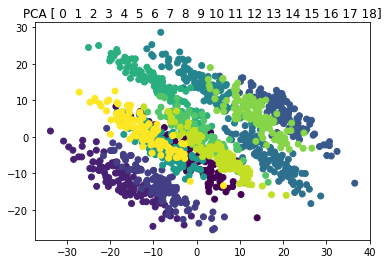

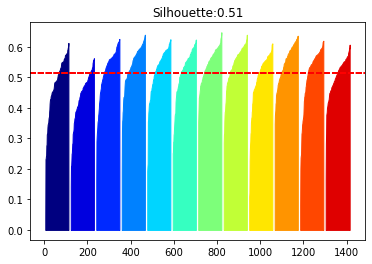

COV 0.9 


/tf/notebooks/discoverS_draft/scripts/data_generator.py:163: RuntimeWarning: covariance is not positive-semidefinite.
  arr = np.random.multivariate_normal(centers[cluster], d_covs[cluster], ns[cluster])


ARI  1.0, std 8


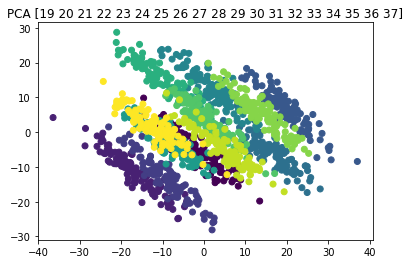

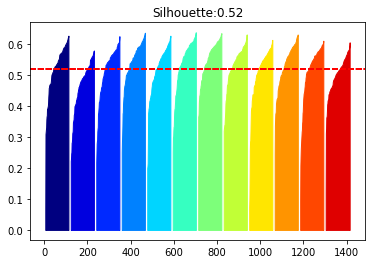

COV 0.9 


/tf/notebooks/discoverS_draft/scripts/data_generator.py:163: RuntimeWarning: covariance is not positive-semidefinite.
  arr = np.random.multivariate_normal(centers[cluster], d_covs[cluster], ns[cluster])


ARI  1.0, std 8


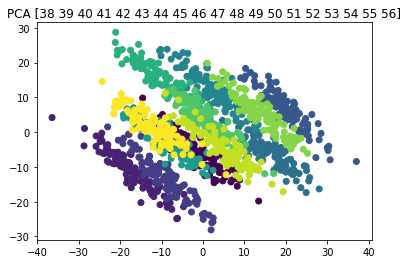

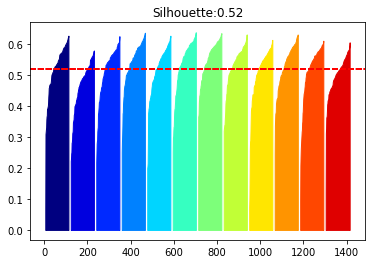

Total: (1300, 462), uniform (1300, 200) , normal (1300, 200),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.15 sec
Entropy computation 0.48 sec
KNN computation 0.01 sec
Sorting and thresholds 0.01 sec
Performing hierarchical clustering...
Hierarchical clustering 0.07 sec
Handle redundant features 0.02 sec
Returning 1 redundant features and  13 important features
*** Exploring 2D feature space with NN ...
handle_close_important (0, 3), total 810, nan
relevant_features 289 => computing 1691 
handle_important_features (0, 3),  total 1691, nan
irrelevant_features 172 => computing 506
handle_not_important_features (0, 3), total 506, nan
handle_all_features 461 => computing 1367


  0%|          | 0/21 [00:00<?, ?it/s]

handle_all_features (0, 3),  total 1367, nan
Returning (0, 3), explored a total of 4374 feature pairs
*** Optimization algorithm 
Non redundant features 461, orig size 462, nb imp : 13
adding 50 random population


 19%|█▉        | 4/21 [00:37<02:41,  9.51s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 5, 24, 38, 43, 316]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.24674,6.0,"Counter({0: 972, 1: 328})"


adding 35 random population


 38%|███▊      | 8/21 [01:33<02:31, 11.62s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 5, 24, 38, 43, 316]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.246740,6.0,"Counter({0: 972, 1: 328})"
1,"[13, 19, 32, 33, 34, 52]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.189283,6.0,"Counter({1: 544, 0: 540, 2: 216})"


adding 46 random population


 57%|█████▋    | 12/21 [02:21<01:39, 11.04s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 5, 24, 38, 43, 316]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.246740,6.0,"Counter({0: 972, 1: 328})"
1,"[13, 19, 32, 33, 34, 52]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.189283,6.0,"Counter({1: 544, 0: 540, 2: 216})"
2,"[2, 11, 16, 21, 30, 35, 40, 49, 54, 457]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1,...",0.140196,10.0,"Counter({0: 736, 1: 524, -1: 40})"


adding 33 random population


 76%|███████▌  | 16/21 [03:10<00:53, 10.65s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 5, 24, 38, 43, 316]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.246740,6.0,"Counter({0: 972, 1: 328})"
1,"[13, 19, 32, 33, 34, 52]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.189283,6.0,"Counter({1: 544, 0: 540, 2: 216})"
2,"[2, 11, 16, 21, 30, 35, 40, 49, 54, 457]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1,...",0.140196,10.0,"Counter({0: 736, 1: 524, -1: 40})"
3,"[14, 51]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1,...",0.152998,2.0,"Counter({2: 573, 1: 475, -1: 177, 0: 75})"


adding 19 random population


 95%|█████████▌| 20/21 [03:48<00:09,  9.36s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 5, 24, 38, 43, 316]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.246740,6.0,"Counter({0: 972, 1: 328})"
1,"[13, 19, 32, 33, 34, 52]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.189283,6.0,"Counter({1: 544, 0: 540, 2: 216})"
2,"[2, 11, 16, 21, 30, 35, 40, 49, 54, 457]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1,...",0.140196,10.0,"Counter({0: 736, 1: 524, -1: 40})"
3,"[14, 51]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1,...",0.152998,2.0,"Counter({2: 573, 1: 475, -1: 177, 0: 75})"
4,"[96, 458]","[0, 0, -1, 2, 2, 2, 2, -1, -1, -1, 1, 0, 2, 2,...",0.138651,2.0,"Counter({0: 501, 2: 495, -1: 280, 1: 24})"


adding 1 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 461, orig size 462, nb imp : 13
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
adding 50 random population


 19%|█▉        | 4/21 [00:36<02:38,  9.29s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.247,"[13, 14, 32, 38, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.0,"Counter({1: 760, 0: 540})"


adding 33 random population


 38%|███▊      | 8/21 [01:27<02:25, 11.19s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.247000,"[13, 14, 32, 38, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.0,"Counter({1: 760, 0: 540})"
1,0.119629,"[0, 2, 16, 21, 30, 35, 40, 45, 49, 54, 457]","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",11.0,"Counter({0: 758, 2: 313, 1: 207, -1: 22})"


adding 44 random population


 57%|█████▋    | 12/21 [02:23<01:51, 12.37s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.247000,"[13, 14, 32, 38, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.0,"Counter({1: 760, 0: 540})"
1,0.119629,"[0, 2, 16, 21, 30, 35, 40, 45, 49, 54, 457]","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",11.0,"Counter({0: 758, 2: 313, 1: 207, -1: 22})"
2,0.159879,"[5, 19, 24, 43]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.0,"Counter({0: 969, 1: 323, -1: 8})"


adding 44 random population


 76%|███████▌  | 16/21 [03:08<00:53, 10.63s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.247000,"[13, 14, 32, 38, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.0,"Counter({1: 760, 0: 540})"
1,0.119629,"[0, 2, 16, 21, 30, 35, 40, 45, 49, 54, 457]","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",11.0,"Counter({0: 758, 2: 313, 1: 207, -1: 22})"
2,0.159879,"[5, 19, 24, 43]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.0,"Counter({0: 969, 1: 323, -1: 8})"
3,0.089468,"[18, 33, 52, 56]","[-1, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, ...",4.0,"Counter({1: 868, 0: 283, -1: 149})"


adding 32 random population


 95%|█████████▌| 20/21 [03:54<00:10, 10.39s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.247000,"[13, 14, 32, 38, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.0,"Counter({1: 760, 0: 540})"
1,0.119629,"[0, 2, 16, 21, 30, 35, 40, 45, 49, 54, 457]","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",11.0,"Counter({0: 758, 2: 313, 1: 207, -1: 22})"
2,0.159879,"[5, 19, 24, 43]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.0,"Counter({0: 969, 1: 323, -1: 8})"
3,0.089468,"[18, 33, 52, 56]","[-1, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, ...",4.0,"Counter({1: 868, 0: 283, -1: 149})"
4,0.060232,"[116, 442]","[1, 0, 0, 0, -1, 0, 1, 0, 0, 1, -1, 0, 0, 0, -...",2.0,"Counter({1: 523, 0: 401, -1: 376})"


adding 1 random population


100%|██████████| 21/21 [04:07<00:00, 11.80s/it]


,adapted_ratkowsky_lance,features,partition,size,structure
0,0.247000,"[13, 14, 32, 38, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.0,"Counter({1: 760, 0: 540})"
1,0.119629,"[0, 2, 16, 21, 30, 35, 40, 45, 49, 54, 457]","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",11.0,"Counter({0: 758, 2: 313, 1: 207, -1: 22})"
2,0.159879,"[5, 19, 24, 43]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.0,"Counter({0: 969, 1: 323, -1: 8})"
3,0.089468,"[18, 33, 52, 56]","[-1, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, ...",4.0,"Counter({1: 868, 0: 283, -1: 149})"
4,0.060232,"[116, 442]","[1, 0, 0, 0, -1, 0, 1, 0, 0, 1, -1, 0, 0, 0, -...",2.0,"Counter({1: 523, 0: 401, -1: 376})"


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 461, orig size 462, nb imp : 13
adding 50 random population


 19%|█▉        | 4/21 [00:59<04:17, 15.14s/it]

,features,partition,silhouette,size,structure
0,"[5, 19, 38, 43]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.538381,4.0,"Counter({0: 971, 1: 324, -1: 5})"


adding 18 random population


 38%|███▊      | 8/21 [02:13<03:33, 16.43s/it]

,features,partition,silhouette,size,structure
0,"[5, 19, 38, 43]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.538381,4.0,"Counter({0: 971, 1: 324, -1: 5})"
1,"[0, 1, 2, 3, 6, 7, 10, 11, 12, 13, 14, 16, 20,...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.492652,34.0,"Counter({7: 112, 9: 108, 0: 108, 3: 108, 4: 10..."


adding 50 random population


 57%|█████▋    | 12/21 [04:13<03:06, 20.72s/it]

,features,partition,silhouette,size,structure
0,"[5, 19, 38, 43]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.538381,4.0,"Counter({0: 971, 1: 324, -1: 5})"
1,"[0, 1, 2, 3, 6, 7, 10, 11, 12, 13, 14, 16, 20,...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.492652,34.0,"Counter({7: 112, 9: 108, 0: 108, 3: 108, 4: 10..."
2,"[377, 433]","[0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0...",0.191033,2.0,"Counter({0: 1097, -1: 192, 1: 11})"


adding 2 random population


 76%|███████▌  | 16/21 [05:15<01:19, 15.86s/it]

,features,partition,silhouette,size,structure
0,"[5, 19, 38, 43]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.538381,4.0,"Counter({0: 971, 1: 324, -1: 5})"
1,"[0, 1, 2, 3, 6, 7, 10, 11, 12, 13, 14, 16, 20,...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.492652,34.0,"Counter({7: 112, 9: 108, 0: 108, 3: 108, 4: 10..."
2,"[377, 433]","[0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0...",0.191033,2.0,"Counter({0: 1097, -1: 192, 1: 11})"
3,"[51, 289]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0...",0.365655,2.0,"Counter({1: 590, 0: 455, -1: 255})"


adding 20 random population


 95%|█████████▌| 20/21 [06:15<00:14, 14.34s/it]

,features,partition,silhouette,size,structure
0,"[5, 19, 38, 43]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.538381,4.0,"Counter({0: 971, 1: 324, -1: 5})"
1,"[0, 1, 2, 3, 6, 7, 10, 11, 12, 13, 14, 16, 20,...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.492652,34.0,"Counter({7: 112, 9: 108, 0: 108, 3: 108, 4: 10..."
2,"[377, 433]","[0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0...",0.191033,2.0,"Counter({0: 1097, -1: 192, 1: 11})"
3,"[51, 289]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0...",0.365655,2.0,"Counter({1: 590, 0: 455, -1: 255})"
4,"[384, 441]","[1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1,...",0.127823,2.0,"Counter({1: 967, -1: 322, 0: 11})"


adding 2 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 461, orig size 462, nb imp : 13
adding 50 random population


 19%|█▉        | 4/21 [01:02<04:35, 16.19s/it]

,adapted_silhouette,features,partition,size,structure
0,0.373716,"[2, 12, 21, 40, 50, 457]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",6.0,"Counter({1: 1192, 0: 108})"


adding 16 random population


 38%|███▊      | 8/21 [02:20<03:46, 17.40s/it]

,adapted_silhouette,features,partition,size,structure
0,0.373716,"[2, 12, 21, 40, 50, 457]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",6.0,"Counter({1: 1192, 0: 108})"
1,0.454072,"[0, 5, 19, 24, 38, 43, 315]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.0,"Counter({0: 972, 1: 328})"


adding 47 random population


 57%|█████▋    | 12/21 [03:37<02:29, 16.56s/it]

,adapted_silhouette,features,partition,size,structure
0,0.373716,"[2, 12, 21, 40, 50, 457]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",6.0,"Counter({1: 1192, 0: 108})"
1,0.454072,"[0, 5, 19, 24, 38, 43, 315]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.0,"Counter({0: 972, 1: 328})"
2,0.361665,"[13, 14, 27, 32, 33, 51, 52, 328]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.0,"Counter({2: 642, 0: 534, 1: 108, -1: 16})"


adding 40 random population


 76%|███████▌  | 16/21 [04:49<01:17, 15.60s/it]

,adapted_silhouette,features,partition,size,structure
0,0.373716,"[2, 12, 21, 40, 50, 457]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",6.0,"Counter({1: 1192, 0: 108})"
1,0.454072,"[0, 5, 19, 24, 38, 43, 315]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.0,"Counter({0: 972, 1: 328})"
2,0.361665,"[13, 14, 27, 32, 33, 51, 52, 328]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.0,"Counter({2: 642, 0: 534, 1: 108, -1: 16})"
3,0.086940,"[271, 351]","[1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1,...",2.0,"Counter({1: 965, -1: 322, 0: 13})"


adding 1 random population


 95%|█████████▌| 20/21 [05:49<00:14, 14.58s/it]

,adapted_silhouette,features,partition,size,structure
0,0.373716,"[2, 12, 21, 40, 50, 457]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",6.0,"Counter({1: 1192, 0: 108})"
1,0.454072,"[0, 5, 19, 24, 38, 43, 315]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.0,"Counter({0: 972, 1: 328})"
2,0.361665,"[13, 14, 27, 32, 33, 51, 52, 328]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.0,"Counter({2: 642, 0: 534, 1: 108, -1: 16})"
3,0.086940,"[271, 351]","[1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1,...",2.0,"Counter({1: 965, -1: 322, 0: 13})"
4,0.101914,"[317, 435]","[1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1...",2.0,"Counter({1: 1011, -1: 278, 0: 11})"


adding 3 random population


100%|██████████| 21/21 [06:14<00:00, 17.83s/it]


In [2]:
for std in [2, 5, 8]:
    print(f">> std {std}")
    n_clusters_per_subpace = [3,6,12]
    cluster_std = None
    n_uniform_features=700
    n_normal_features=700
    n_neg_binomial = 700
    n_gamma = 500
    n_redundant_clusters = 0
    n_redundant_cluster_size = 0
    for n_clusters in np.unique(n_clusters_per_subpace): 

        n_redundant_clusters = 0
        n_redundant_cluster_size = 0
        data, best_subspaces, truths = data_generator.make_data_for_ga(
                         [n_clusters, n_clusters, n_clusters],
                         cluster_std=[std, std,std],
                         n_uniform_features=200,
                         n_normal_features=200,
                         n_neg_binomial=0,
                         n_gamma=0,
                         n_beta=0,
                         random_redundant=True,
                         n_redundant=5,
                         n_outlier_features=0,
                         n_cutoff=0,
                         n_bimodal_features=0,
                         min_subspace_features=19,
                         max_subspace_features=20,
                         max_neg_bin_p = 0.3,
                         n_samples=1300,
                         plot=True,
                         isotropic = False)

        imp_f = np.concatenate(best_subspaces)
        data.shape, imp_f, best_subspaces

        truth = None

        clustering ="hdbscan"

        meta_features = feature_ranking.rank_features(data,
                                                      nb_bins=20,
                                                      rank_threshold=90,
                                                      z_file=None,
                                                      metric='euclidean',
                                                      redundant_threshold=0.4)
    
        model_file = f'../models/gmm_arl.h5' 
        population2, n = features_2d.run(
            data,
            n_clusters,
            meta_features,
            model_file=model_file,
            add_close_population=False,
            theta=0.09,
        )

        globalResults = {}

        ############## ratkowsky_lance #######################
        method = "ratkowsky_lance"
        threshold=0.09
        score_tolerance=0.009
        round_size = 4
        debug = False
        ignore_redundant= True
        epochs = 5*round_size


        sampling = {
            "ARCHIVE2D": { 
                "ga": 0.5,
                "max": 0.5 },
            "CLOSE": { 
                "ga": 0.25,
                "max": 0.25 },
            "IMP1D": { 
                "ga": 0.15,
                "max": 0.15 },
            "RANDOM": { 
                "ga": 0.1,
                "max": 0.1},
        }
        params = ga.ga_parameters(
            n_clusters,
            data.shape[1],
            truth,
            meta_features,
            method=method,
            truth_methods=['ari'],
            archive_2d=population2.iloc[:1000],
            debug=debug,
            epochs=epochs,
            round_size=round_size,
            sampling = sampling,
            ignore_redundant = ignore_redundant,
            allow_subspace_overlap = False,
            improvement_per_mutation_report = True,
            score_tolerance=score_tolerance,
            clustering = clustering,
            total_maximisation_exploration = 100

        )
        solutions, archive= ga.run(data, params)
        globalResults[f"{clustering}_{method}_{n_clusters}_pop2"] = solutions
        
        ############## adapted_ratkowsky_lance #######################
        method = "adapted_ratkowsky_lance"
        threshold=0.09
        score_tolerance=0.009
        round_size = 4
        debug = False
        ignore_redundant= True
        epochs = 5*round_size


        sampling = {
            "ARCHIVE2D": { 
                "ga": 0.5,
                "max": 0.5 },
            "CLOSE": { 
                "ga": 0.25,
                "max": 0.25 },
            "IMP1D": { 
                "ga": 0.15,
                "max": 0.15 },
            "RANDOM": { 
                "ga": 0.1,
                "max": 0.1},
        }
        params = ga.ga_parameters(
            n_clusters,
            data.shape[1],
            truth,
            meta_features,
            method=method,
            truth_methods=['ari'],
            archive_2d=population2.iloc[:1000],
            debug=debug,
            epochs=epochs,
            round_size=round_size,
            sampling = sampling,
            ignore_redundant = ignore_redundant,
            allow_subspace_overlap = False,
            improvement_per_mutation_report = True,
            score_tolerance=score_tolerance,
            clustering = clustering,
            total_maximisation_exploration = 100

        )
        print(params["sampling_actions"], params["maximisation_sizes"] , params["sampling_prob"])
        params

        solutions, archive= ga.run(data, params)
        display(solutions)
        globalResults[f"{clustering}_{method}_{n_clusters}_pop2"] = solutions

        ############## silhouette #######################
        method = "silhouette"
        threshold=0.1
        score_tolerance=0.01
        round_size = 4
        debug = False
        ignore_redundant= True
        epochs = 5*round_size


        sampling = {
            "ARCHIVE2D": { 
                "ga": 0.5,
                "max": 0.5 },
            "CLOSE": { 
                "ga": 0.25,
                "max": 0.25 },
            "IMP1D": { 
                "ga": 0.15,
                "max": 0.15 },
            "RANDOM": { 
                "ga": 0.1,
                "max": 0.1},
        }
        params = ga.ga_parameters(
            n_clusters,
            data.shape[1],
            truth,
            meta_features,
            method=method,
            truth_methods=['ari'],
            archive_2d=population2.iloc[:1000],
            debug=debug,
            epochs=epochs,
            round_size=round_size,
            sampling = sampling,
            ignore_redundant = ignore_redundant,
            allow_subspace_overlap = False,
            improvement_per_mutation_report = True,
            score_tolerance=score_tolerance,
            clustering = clustering,
            total_maximisation_exploration = 100

        )

        solutions, archive= ga.run(data, params)
        globalResults[f"{clustering}_{method}_{n_clusters}_pop3"] = solutions

        ############## adapted_silhouette #######################
        method = "adapted_silhouette"
        threshold=0.1
        score_tolerance=0.01
        round_size = 4
        debug = False
        ignore_redundant= True
        epochs = 5*round_size


        sampling = {
            "ARCHIVE2D": { 
                "ga": 0.5,
                "max": 0.5 },
            "CLOSE": { 
                "ga": 0.25,
                "max": 0.25 },
            "IMP1D": { 
                "ga": 0.15,
                "max": 0.15 },
            "RANDOM": { 
                "ga": 0.1,
                "max": 0.1},
        }
        params = ga.ga_parameters(
            n_clusters,
            data.shape[1],
            truth,
            meta_features,
            method=method,
            truth_methods=['ari'],
            archive_2d=population2.iloc[:1000],
            debug=debug,
            epochs=epochs,
            round_size=round_size,
            sampling = sampling,
            ignore_redundant = ignore_redundant,
            allow_subspace_overlap = False,
            improvement_per_mutation_report = True,
            score_tolerance=score_tolerance,
            clustering = clustering,
            total_maximisation_exploration = 100

        )

        solutions, archive= ga.run(data, params)
        globalResults[f"{clustering}_{method}_{n_clusters}_pop3"] = solutions
        eval_df = ga_evaluation.evaluate_ga_result(globalResults, best_subspaces, truths)
        eval_df.to_pickle(f"../data/GA/nonisotropic_GA_hdbscan__{std}_{n_clusters}.pkl")

In [2]:
df = None
n_clusters_per_subpace = [3,6,12]
# for std in [0.5, 1, 1.5, 2, 3, 4]:
for std in [2, 5, 8]:
    for n_clusters in n_clusters_per_subpace:
        eval_df = pd.read_pickle(f"../data/GA/nonisotropic_GA_hdbscan__{std}_{n_clusters}.pkl")
    #     eval_df = pd.read_pickle(f"../data/GA/GA_hdbscan_{std}_20000.pkl")
        eval_df["std"] = std
        if df is None:
            df = eval_df
        else:
            df = pd.concat([df, eval_df])

In [3]:
df.experiment.unique()

array(['hdbscan_ratkowsky_lance_3_pop2',
       'hdbscan_adapted_ratkowsky_lance_3_pop2',
       'hdbscan_silhouette_3_pop3', 'hdbscan_adapted_silhouette_3_pop3',
       'hdbscan_ratkowsky_lance_6_pop2',
       'hdbscan_adapted_ratkowsky_lance_6_pop2',
       'hdbscan_silhouette_6_pop3', 'hdbscan_adapted_silhouette_6_pop3',
       'hdbscan_ratkowsky_lance_12_pop2',
       'hdbscan_adapted_ratkowsky_lance_12_pop2',
       'hdbscan_silhouette_12_pop3', 'hdbscan_adapted_silhouette_12_pop3'],
      dtype=object)

In [4]:


columns={
            'Adapted Ratkowsky Lance': "Penalized\nRatkowski Lance",
            'Adapted Silhouette': "Penalized\nSilhouette",
            
        }
df["experiment"] = df["experiment"].apply(
    lambda l: " ".join(x.title() for x in l.split("_")[1:-2]))

df = df.rename(columns = {"ari": "ARI", "identified_features": "% Identified Features",
                         'true_nb_clust' : "Nb Clusters"})
df = df.sort_values(by = "experiment")
# df["experiment"] = df["experiment"].apply(lambda x: columns.get(x, x))

In [5]:
df["experiment"] = df["experiment"].apply(lambda x: columns[x] if x in columns else x)

In [6]:
df.groupby("experiment").mean()[["% Identified Features", "ARI"]].T

experiment,Penalized\nRatkowski Lance,Penalized\nSilhouette,Ratkowsky Lance,Silhouette
% Identified Features,0.204678,0.517827,0.111221,0.388385
ARI,0.329851,0.803128,0.311677,0.894904


In [7]:
df.groupby("experiment").mean()[["% Identified Features", "ARI"]].T.mean()

experiment
Penalized\nRatkowski Lance    0.267265
Penalized\nSilhouette         0.660478
Ratkowsky Lance               0.211449
Silhouette                    0.641644
dtype: float64

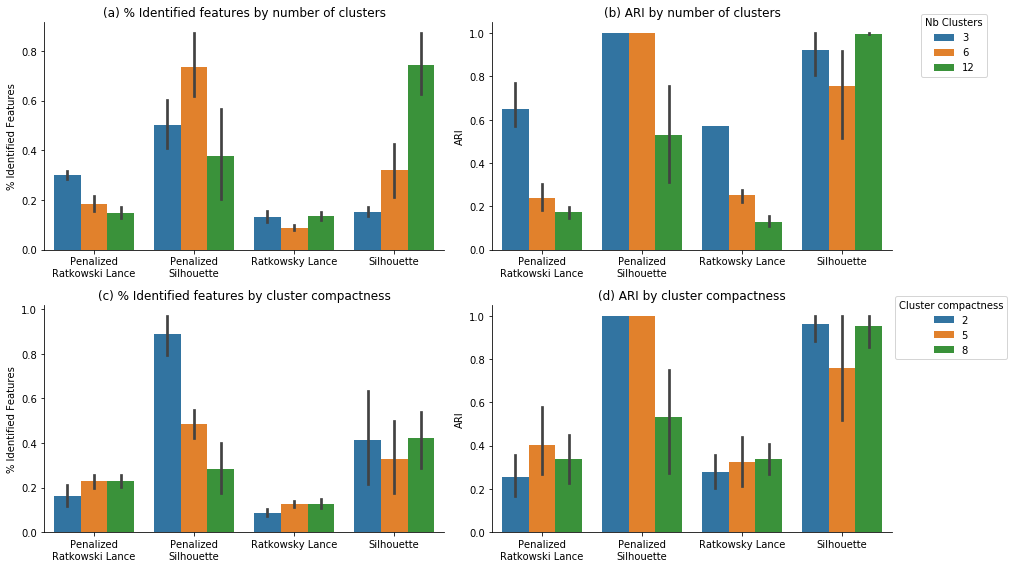

In [8]:
plt.figure(figsize = (14, 8 ))
ax = plt.subplot(221)
g = sns.barplot(x = "experiment" , y = "% Identified Features", data = df, hue = "Nb Clusters", ax = ax)
g.legend_.remove()
plt.title("(a) % Identified features by number of clusters")
plt.xlabel("")
sns.despine()

ax = plt.subplot(222)
g = sns.barplot(x = "experiment" , y = "ARI", data = df, hue = "Nb Clusters", ax = ax)
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.9), ncol=1, title = "Nb Clusters")
plt.xlabel("")
plt.title("(b) ARI by number of clusters")
sns.despine()


ax = plt.subplot(223)
g = sns.barplot(x = "experiment" , y = "% Identified Features", data = df, hue = "std", ax = ax)
g.legend_.remove()
plt.xlabel("")
plt.title("(c) % Identified features by cluster compactness")
sns.despine()

ax = plt.subplot(224)
g = sns.barplot(x = "experiment" , y = "ARI", data = df, hue = "std", ax = ax)
g.legend(loc='center right', bbox_to_anchor=(1.3, 0.9), ncol=1, title = "Cluster compactness")
plt.xlabel("")
plt.title("(d) ARI by cluster compactness")
sns.despine()
plt.tight_layout()
plt.savefig(f"images/HDBSCAN_subspace_clustering.pdf", bbox_inches='tight')

In [ ]:
plt.figure(figsize = (10, 10 ))
ax = plt.subplot(311)
g = df.groupby("experiment").mean()[["% Identified Features", "ARI"]].T.plot(kind = "bar", ax = ax)
plt.title("(a) Mean values")
plt.xticks(rotation =0 )
sns.despine()
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.9), ncol=1)


ax = plt.subplot(312)
g = df.groupby(
    ["experiment", "std"]).mean()["% Identified Features"].unstack(1).T.plot(kind="bar", ax = ax)
plt.xticks(rotation =0 )
sns.despine()
g.legend_.remove()
plt.title("(b)% Identified Features by cluster std")
plt.xlabel("Clusters standard deviation")
plt.ylabel("% Identified Features")

ax = plt.subplot(313)
g = df.groupby(
    ["experiment", "std"]).mean()["ARI"].unstack(1).T.plot(kind="bar", ax = ax)
sns.despine()
plt.title("(c) ARI by cluster std")
plt.xlabel("Clusters standard deviation")
plt.ylabel("ARI")

plt.xticks(rotation =0 )
g.legend_.remove()
plt.tight_layout()
# plt.savefig(f"images/ARI_features_internal_scores_small_dataset_GMM.pdf", bbox_inches='tight')